In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from ipywidgets import IntSlider, interact
from glob import glob
from scipy.stats import pearsonr


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/project/Delhi.csv
/kaggle/input/project/Kolkata.csv
/kaggle/input/project/Hyderabad.csv
/kaggle/input/project/Bangalore.csv
/kaggle/input/project/Mumbai.csv
/kaggle/input/project/Chennai.csv


In [2]:
def wrangle(filename):
    # Read a CSV file
    df = pd.read_csv(filename)
    
    # Removing 9 from the dataset to remain with 0 and 1 as yes or no
    df.replace(9, np.nan, inplace=True)
    df.dropna(inplace=True)
    
    # Removing columns 'Wifi' and 'Wardrobe' because they only contain 0 value only
    df.drop(columns = ['Wifi', 'Wardrobe'], inplace=True)
    
    # Removing 'Price' higher than 100000000
    maskprice = df["Price"]< 100000000
    df = df[maskprice]
    
    return df

In [3]:
files = glob("/kaggle/input/project")
files

['/kaggle/input/project']

In [4]:
custom_colors = ["#4e89ae", "#c56183","#ed6663","#ffa372"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))

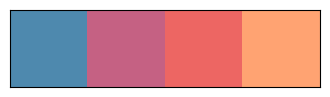

In [5]:
sns.palplot(sns.color_palette(custom_colors),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

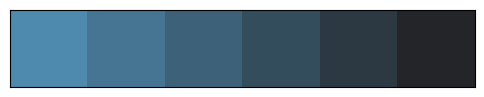

In [6]:
mumbai = sns.dark_palette(custom_colors[0], reverse=True)
sns.palplot(sns.color_palette(mumbai),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

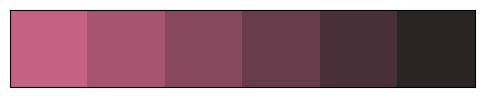

In [7]:
delhi = sns.dark_palette(custom_colors[1], reverse=True)
sns.palplot(sns.color_palette(delhi),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

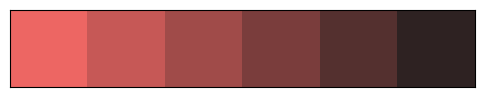

In [8]:
chennai = sns.dark_palette(custom_colors[2], reverse=True)
sns.palplot(sns.color_palette(chennai),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

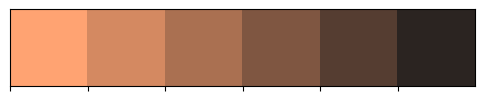

In [9]:
hyderabad = sns.dark_palette(custom_colors[3], reverse=True)
sns.palplot(sns.color_palette(hyderabad),size=1)

In [10]:
df1= pd.read_csv('/kaggle/input/project/Mumbai.csv')
df2= pd.read_csv('/kaggle/input/project/Delhi.csv')
df3= pd.read_csv('/kaggle/input/project/Chennai.csv')
df4= pd.read_csv('/kaggle/input/project/Hyderabad.csv')
df5= pd.read_csv('/kaggle/input/project/Kolkata.csv')
df6= pd.read_csv('/kaggle/input/project/Bangalore.csv')

In [11]:
df1.head(5)

Price  Area  Location  No. of Bedrooms  Resale  MaintenanceStaff  \
0  4850000   720  Kharghar                1       1                 1   
1  4500000   600  Kharghar                1       1                 1   
2  6700000   650  Kharghar                1       1                 1   
3  4500000   650  Kharghar                1       1                 1   
4  5000000   665  Kharghar                1       1                 1   

   Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  ...  \
0          0             0                  0             0  ...   
1          1             1                  0             1  ...   
2          1             1                  0             1  ...   
3          0             0                  1             0  ...   
4          0             0                  1             0  ...   

   LiftAvailable  BED  VaastuCompliant  Microwave  GolfCourse  TV  \
0              1    0                1          0           0   0   
1              1    0                1          0           0   0   
2              1    0                1          0           0   0   
3              1    1                1          0           0   0   
4              1    0                1          0           0   0   

   DiningTable  Sofa  Wardrobe  Refrigerator  
0            0     0         0             0  
1            0     0         0             0  
2            0     0         0             0  
3            0     0         1             0  
4            0     0         0             0  

[5 rows x 40 columns]

In [12]:
df2.head(5)

Price  Area          Location  No. of Bedrooms  Resale  \
0  10500000  1200  Sector 10 Dwarka                2       1   
1   6000000  1000       Uttam Nagar                3       0   
2  15000000  1350      Sarita Vihar                2       1   
3   2500000   435       Uttam Nagar                2       0   
4   5800000   900        Dwarka Mor                3       0   

   MaintenanceStaff  Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  \
0                 0          1             0                  0             1   
1                 0          0             0                  0             0   
2                 0          0             0                  0             0   
3                 0          0             0                  0             0   
4                 0          0             0                  0             0   

   ...  LiftAvailable  BED  VaastuCompliant  Microwave  GolfCourse  TV  \
0  ...              1    0                1          0           0   0   
1  ...              0    0                0          0           0   0   
2  ...              0    0                0          0           0   0   
3  ...              0    0                1          0           0   0   
4  ...              1    0                0          0           0   0   

   DiningTable  Sofa  Wardrobe  Refrigerator  
0            0     0         0             0  
1            0     0         0             0  
2            0     0         0             0  
3            0     0         0             0  
4            0     0         0             0  

[5 rows x 40 columns]

In [13]:
df3.head(5)

Price  Area        Location  No. of Bedrooms  Resale  MaintenanceStaff  \
0   5500000  1310   Perungalathur                3       0                 0   
1   5350000  1126      Madhavaram                2       0                 0   
2   8205000  1307      Karapakkam                3       0                 0   
3  23400000  3600  Thiruvidandhai                3       0                 0   
4  10100000  1700  Iyappanthangal                3       0                 0   

   Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  ...  \
0          0             0                  0             0  ...   
1          1             1                  1             0  ...   
2          1             1                  1             1  ...   
3          1             1                  0             1  ...   
4          1             1                  1             1  ...   

   LiftAvailable  BED  VaastuCompliant  Microwave  GolfCourse  TV  \
0              0    0                0          0           0   0   
1              1    0                0          0           0   0   
2              0    0                0          0           0   0   
3              0    0                0          0           0   0   
4              0    0                1          0           0   0   

   DiningTable  Sofa  Wardrobe  Refrigerator  
0            0     0         0             0  
1            0     0         0             0  
2            0     0         0             0  
3            0     0         0             0  
4            0     0         0             0  

[5 rows x 40 columns]

In [14]:
df4.head(5)

Price  Area     Location  No. of Bedrooms  Resale  MaintenanceStaff  \
0   6968000  1340     Nizampet                2       0                 0   
1  29000000  3498  Hitech City                4       0                 0   
2   6590000  1318    Manikonda                2       0                 0   
3   5739000  1295        Alwal                3       1                 0   
4   5679000  1145   Kukatpally                2       0                 0   

   Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  ...  \
0          1             1                  1             1  ...   
1          1             1                  1             1  ...   
2          1             0                  0             0  ...   
3          0             0                  0             0  ...   
4          0             0                  1             0  ...   

   LiftAvailable  BED  VaastuCompliant  Microwave  GolfCourse  TV  \
0              1    0                1          0           0   0   
1              1    0                1          0           0   0   
2              0    0                0          0           0   0   
3              1    0                0          0           0   0   
4              1    0                0          0           0   0   

   DiningTable  Sofa  Wardrobe  Refrigerator  
0            0     0         0             0  
1            0     0         0             0  
2            0     0         0             0  
3            0     0         0             0  
4            0     0         0             0  

[5 rows x 40 columns]

In [15]:
df5.head(5)

Price  Area     Location  No. of Bedrooms  Resale  MaintenanceStaff  \
0  2235000  1016      Barasat                3       0                 0   
1  3665999  1111    Keshtopur                2       0                 1   
2  3774000  1020     Rajarhat                2       0                 0   
3  2524000   935  Narendrapur                2       0                 0   
4  8300000  1956     New Town                3       1                 0   

   Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  ...  \
0          1             1                  1             1  ...   
1          1             0                  1             1  ...   
2          1             0                  0             0  ...   
3          1             1                  1             1  ...   
4          1             1                  1             1  ...   

   LiftAvailable  BED  VaastuCompliant  Microwave  GolfCourse  TV  \
0              1    0                0          0           0   0   
1              0    0                0          0           0   0   
2              1    0                0          0           0   0   
3              0    0                0          0           0   0   
4              1    0                1          0           0   0   

   DiningTable  Sofa  Wardrobe  Refrigerator  
0            0     0         0             0  
1            0     0         0             0  
2            0     0         0             0  
3            0     0         0             0  
4            0     0         0             0  

[5 rows x 40 columns]

In [16]:
df6.head(5)

Price  Area                         Location  No. of Bedrooms  Resale  \
0  30000000  3340                 JP Nagar Phase 1                4       0   
1   7888000  1045       Dasarahalli on Tumkur Road                2       0   
2   4866000  1179  Kannur on Thanisandra Main Road                2       0   
3   8358000  1675                     Doddanekundi                3       0   
4   6845000  1670                          Kengeri                3       0   

   MaintenanceStaff  Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  \
0                 1          1             1                  1             1   
1                 0          1             1                  1             1   
2                 0          1             1                  1             1   
3                 0          0             0                  0             0   
4                 1          1             1                  1             1   

   ...  LiftAvailable  BED  VaastuCompliant  Microwave  GolfCourse  TV  \
0  ...              1    0                0          0           0   0   
1  ...              1    0                1          0           0   0   
2  ...              1    0                0          0           0   0   
3  ...              1    0                0          0           0   0   
4  ...              1    0                0          0           0   0   

   DiningTable  Sofa  Wardrobe  Refrigerator  
0            0     0         0             0  
1            0     0         0             0  
2            0     0         0             0  
3            0     0         0             0  
4            0     0         0             0  

[5 rows x 40 columns]

In [17]:
df1.replace(9, np.nan, inplace=True)
df2.replace(9, np.nan, inplace=True)
df3.replace(9, np.nan, inplace=True)
df4.replace(9, np.nan, inplace=True)
df5.replace(9, np.nan, inplace=True)
df6.replace(9, np.nan, inplace=True)

In [18]:
df1 = df1.dropna()
df2 = df2.dropna()
df3 = df3.dropna()
df4 = df4.dropna()
df5 = df5.dropna()
df6 = df6.dropna()

In [19]:
import pandas as pd

# Read individual CSV files into DataFrames
df1 = pd.read_csv('/kaggle/input/project/Mumbai.csv')
df2 = pd.read_csv('/kaggle/input/project/Delhi.csv')
df3 = pd.read_csv('/kaggle/input/project/Chennai.csv')
df4 = pd.read_csv('/kaggle/input/project/Hyderabad.csv')
df5 = pd.read_csv('/kaggle/input/project/Kolkata.csv')
df6 = pd.read_csv('/kaggle/input/project/Bangalore.csv')

# Concatenate DataFrames vertically (row-wise)
merged_data = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)

# Save the merged DataFrame to a new CSV file
merged_data.to_csv('/kaggle/working/merged_file.csv', index=False)

df7 = pd.read_csv('/kaggle/working/merged_file.csv')

In [20]:
!pip install colorama  # Make sure colorama is installed

from colorama import Fore, init
init(autoreset=True)  # Initialize colorama with autoreset=True

# Your existing code
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA

In [21]:
print(f"{y_}Mumbai:{r_}{df1.shape}\n")
print(f"{y_}Delhi:{r_}{df2.shape}\n")
print(f"{y_}Chennai:{r_}{df3.shape}\n")
print(f"{y_}Hyderabad:{r_}{df4.shape}\n")
print(f"{y_}Kolkata:{r_}{df5.shape}\n")
print(f"{y_}Bangalore:{r_}{df6.shape}\n")

Mumbai:(7719, 40)

Delhi:(4998, 40)

Chennai:(5014, 40)

Hyderabad:(2518, 40)

Kolkata:(6507, 40)

Bangalore:(6207, 40)



In [22]:
print(f"{y_}Data types of data columns: \n{m_}{df1.dtypes}")

Data types of data columns: 
Price                   int64
Area                    int64
Location               object
No. of Bedrooms         int64
Resale                  int64
MaintenanceStaff        int64
Gymnasium               int64
SwimmingPool            int64
LandscapedGardens       int64
JoggingTrack            int64
RainWaterHarvesting     int64
IndoorGames             int64
ShoppingMall            int64
Intercom                int64
SportsFacility          int64
ATM                     int64
ClubHouse               int64
School                  int64
24X7Security            int64
PowerBackup             int64
CarParking              int64
StaffQuarter            int64
Cafeteria               int64
MultipurposeRoom        int64
Hospital                int64
WashingMachine          int64
Gasconnection           int64
AC                      int64
Wifi                    int64
Children'splayarea      int64
LiftAvailable           int64
BED                     int64
VaastuCompl

In [23]:
#converting the price in lakhs
df1['Price'] = df1['Price']/100000
df2['Price'] = df1['Price']/100000
df3['Price'] = df1['Price']/100000
df4['Price'] = df1['Price']/100000
df5['Price'] = df1['Price']/100000
df6['Price'] = df1['Price']/100000

In [24]:
c1 = ["#4e89ae","#BFD5E2"]
c2 = ["#c56183","#E6BCCA"]
c3 = ["#ed6663","#F7BDBC"]
c4 = ["#ffa372","#FFDECC"]
# Change the color
c5 = ["#ffa372","#FFDECC"]   
c6 = ["#ffa372","#FFDECC"]

In [25]:
import plotly.graph_objects as go
def pie_chart(df,link,c,addAll = True):
    df = df.iloc [:,5:-2] 
    fig = go.Figure()
    for column in df.columns.to_list():
        val = df[column].value_counts().rename_axis('unique_values').reset_index(name='val_count')
        labels = val['unique_values']
        values = val['val_count']
        fig.add_trace(
            go.Pie(
                labels=labels, 
                values=values,
                marker_colors=c
            )
        )
        button_all = dict(label = 'All',
                      method = 'update',
                      args = [{'visible': df.columns.isin(df.columns),
                               'title': 'All',
                               'showlegend':True}])


    def create_layout_button(column):
        return dict(label = column,
                    method = 'update',
                    args = [{'visible': df.columns.isin([column]),
                             'title': column,
                             'showlegend': True}])
    fig.add_layout_image(
    dict(
        source=link,
        xref="paper", yref="paper",
        x=0.5, y=0.95,
        sizex=0.9, sizey=0.6,
        xanchor="center", yanchor="bottom"
    )
    )
    fig.update_layout(
        updatemenus=[go.layout.Updatemenu(
            active = 0,
            buttons = ([button_all] * addAll) + list(df.columns.map(lambda column: create_layout_button(column)))
            )
        ])
    
    fig.show()

In [26]:
pie_chart(df1,"https://i.imgur.com/OEr0Lw2.png",c1)
# need to add image of the pie chart according to our data

In [27]:
pie_chart(df2,"https://i.imgur.com/Byi2BQE.png",c2)

In [28]:
pie_chart(df3,"https://i.imgur.com/8Yxjfhx.png",c3)

In [29]:
pie_chart(df4,"https://i.imgur.com/KXYLDQV.png",c4)

In [30]:
pie_chart(df5,"https://i.imgur.com/KXYLDQV.png",c5)

In [31]:
pie_chart(df6,"",c6)

In [32]:
# merged = pd.read_csv('/kaggle/input/project/Chennai.csv')
# print(merged.columns)
# merged = merged.rename(columns={"Children'splayarea": "ChildrenPlayArea"})
# merged = merged.dropna()

In [33]:
# merged = pd.read_csv('/kaggle/input/project/Delhi.csv')
# print(merged.columns)
# merged = merged.rename(columns={"Children'splayarea": "ChildrenPlayArea"})
# merged = merged.dropna()

In [34]:
# merged = pd.read_csv('/kaggle/input/project/Hyderabad.csv')
# print(merged.columns)
# merged = merged.rename(columns={"Children'splayarea": "ChildrenPlayArea"})
# merged = merged.dropna()

<Axes: >

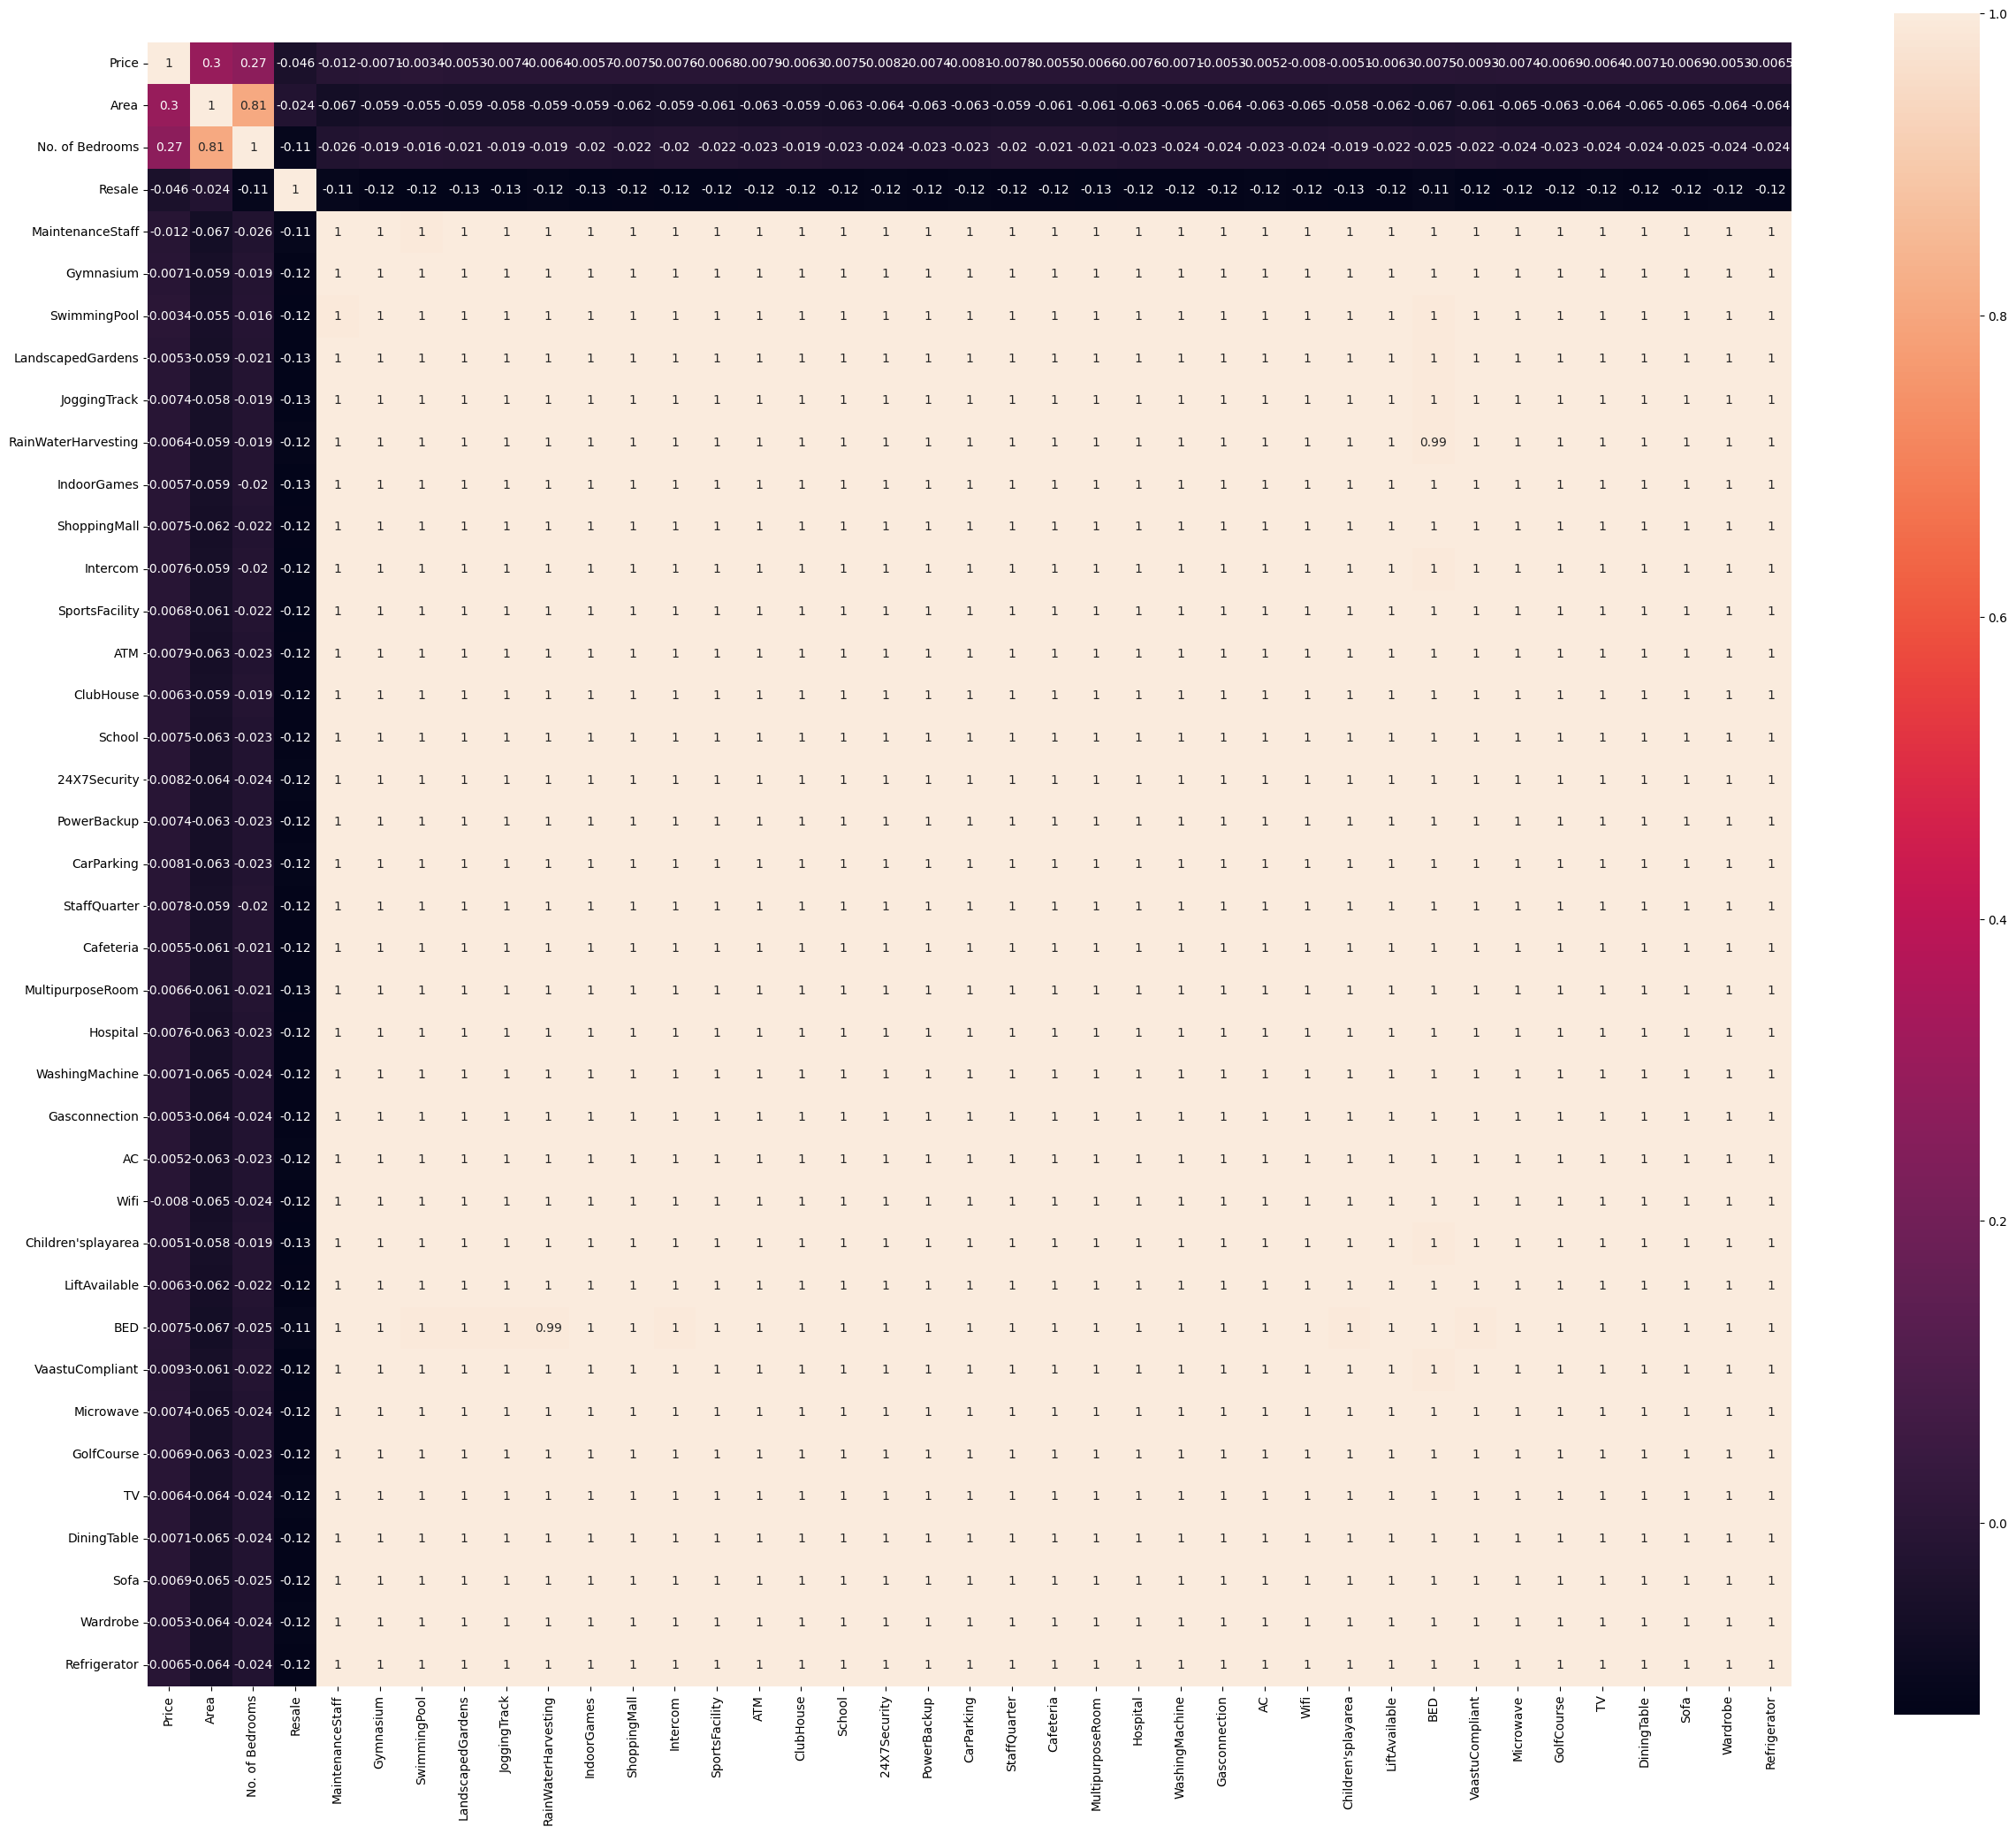

In [35]:
# heatmap_merged = df1.select_dtypes(exclude='object')
# plt.figure(figsize=(30,35))
# sns.heatmap(heatmap_merged.corr(),annot=True)

number_columns = df1.select_dtypes(exclude='object')
numbers_correlation = number_columns.corr()
plt.figure(figsize=(30,25))
sns.heatmap(numbers_correlation, annot=True, square=True)

<Axes: >

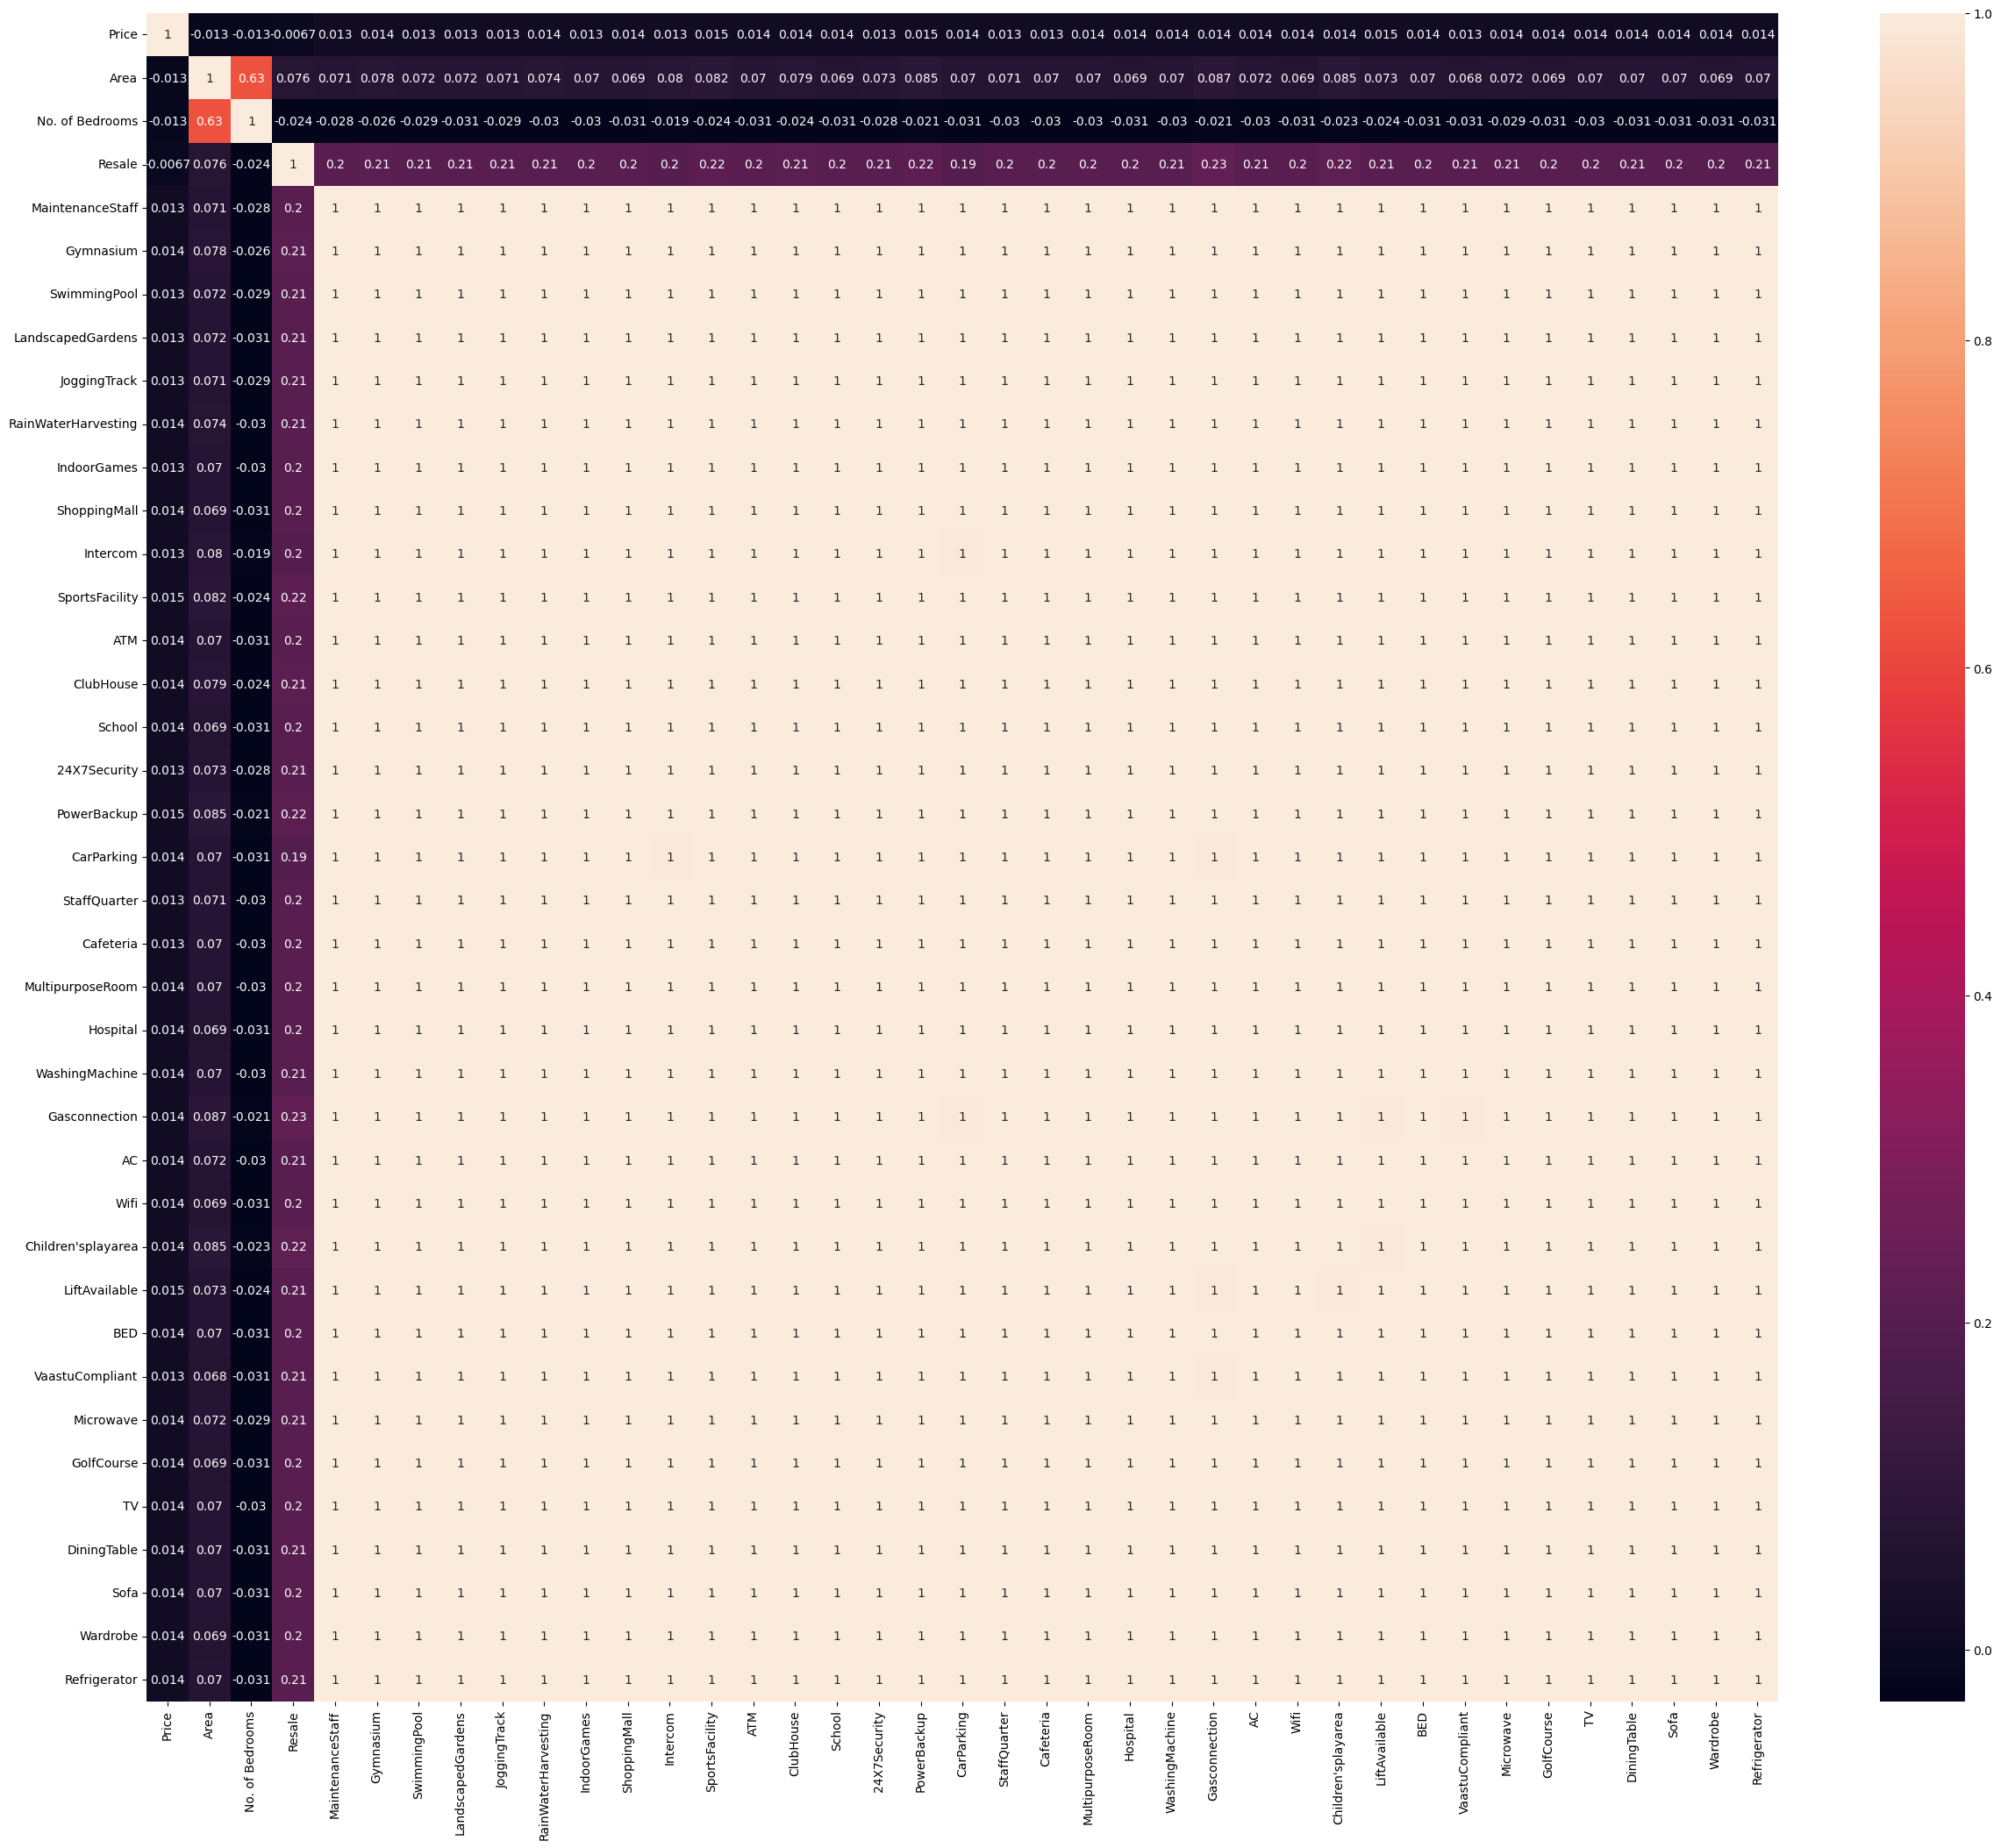

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_merged = df2.select_dtypes(exclude='object')
plt.figure(figsize=(30,25))
sns.heatmap(heatmap_merged.corr(),annot=True)

<Axes: >

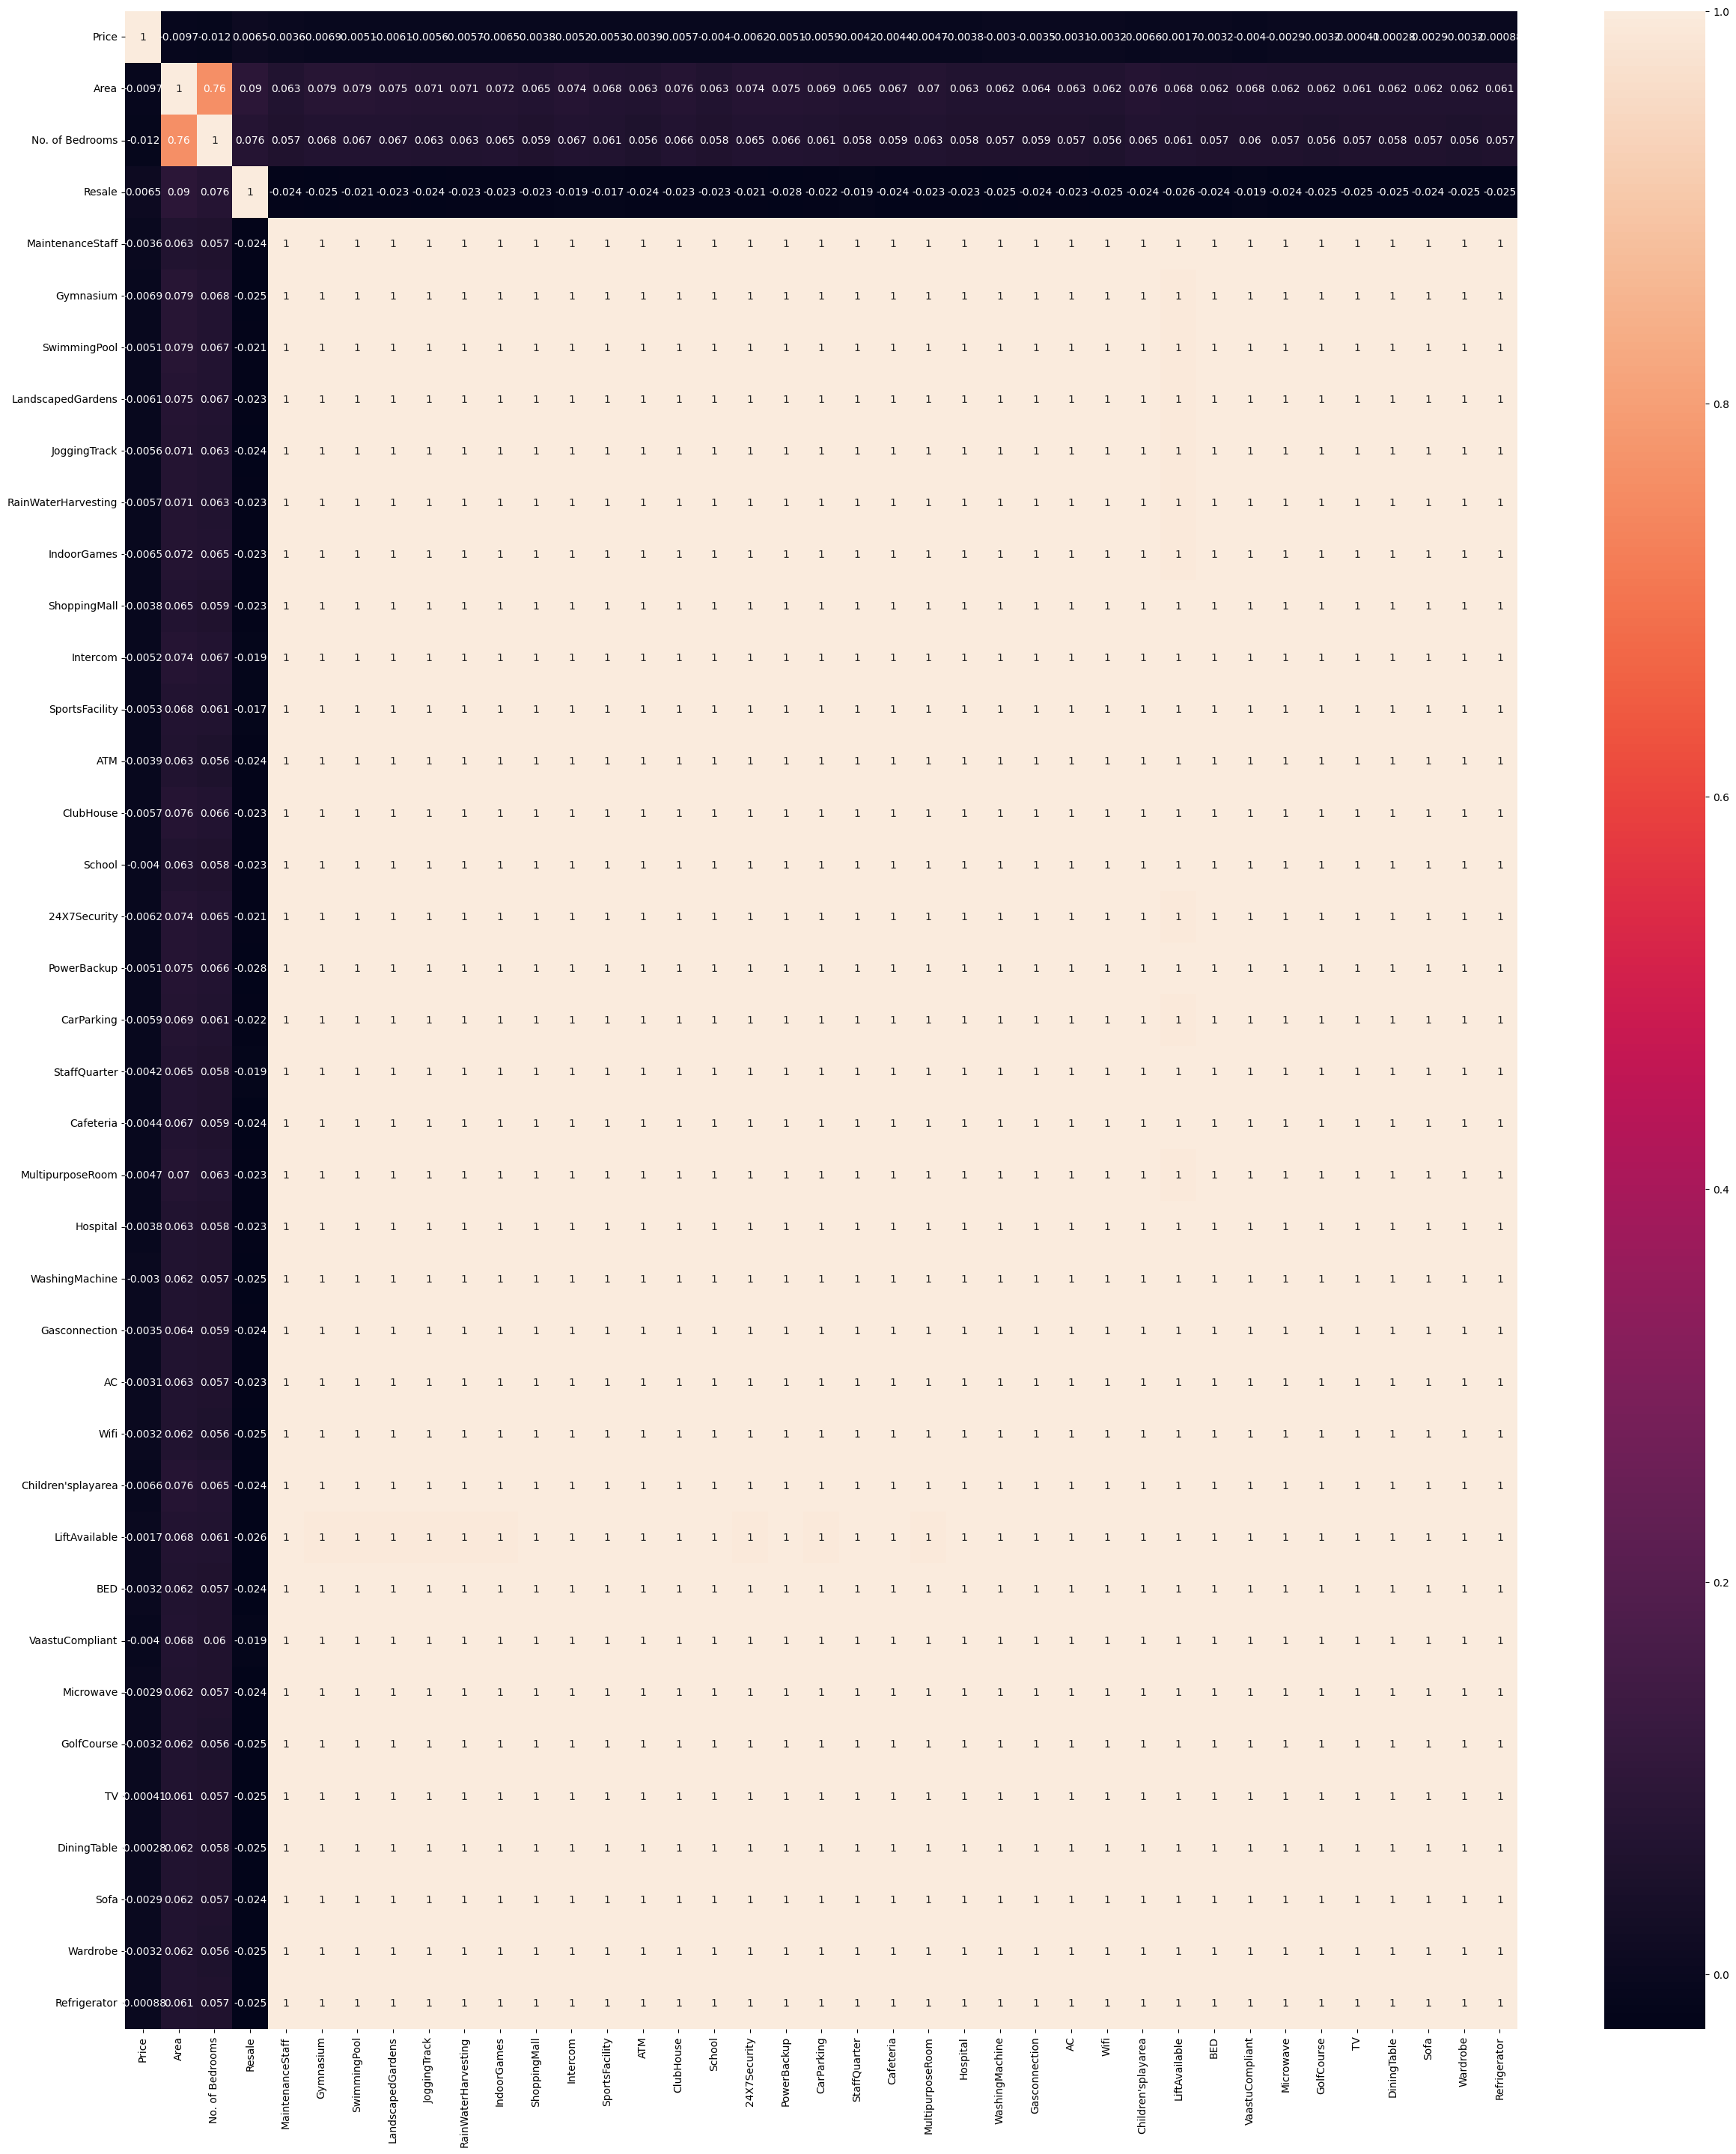

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_merged = df3.select_dtypes(exclude='object')
plt.figure(figsize=(30,35))
sns.heatmap(heatmap_merged.corr(),annot=True)

<Axes: >

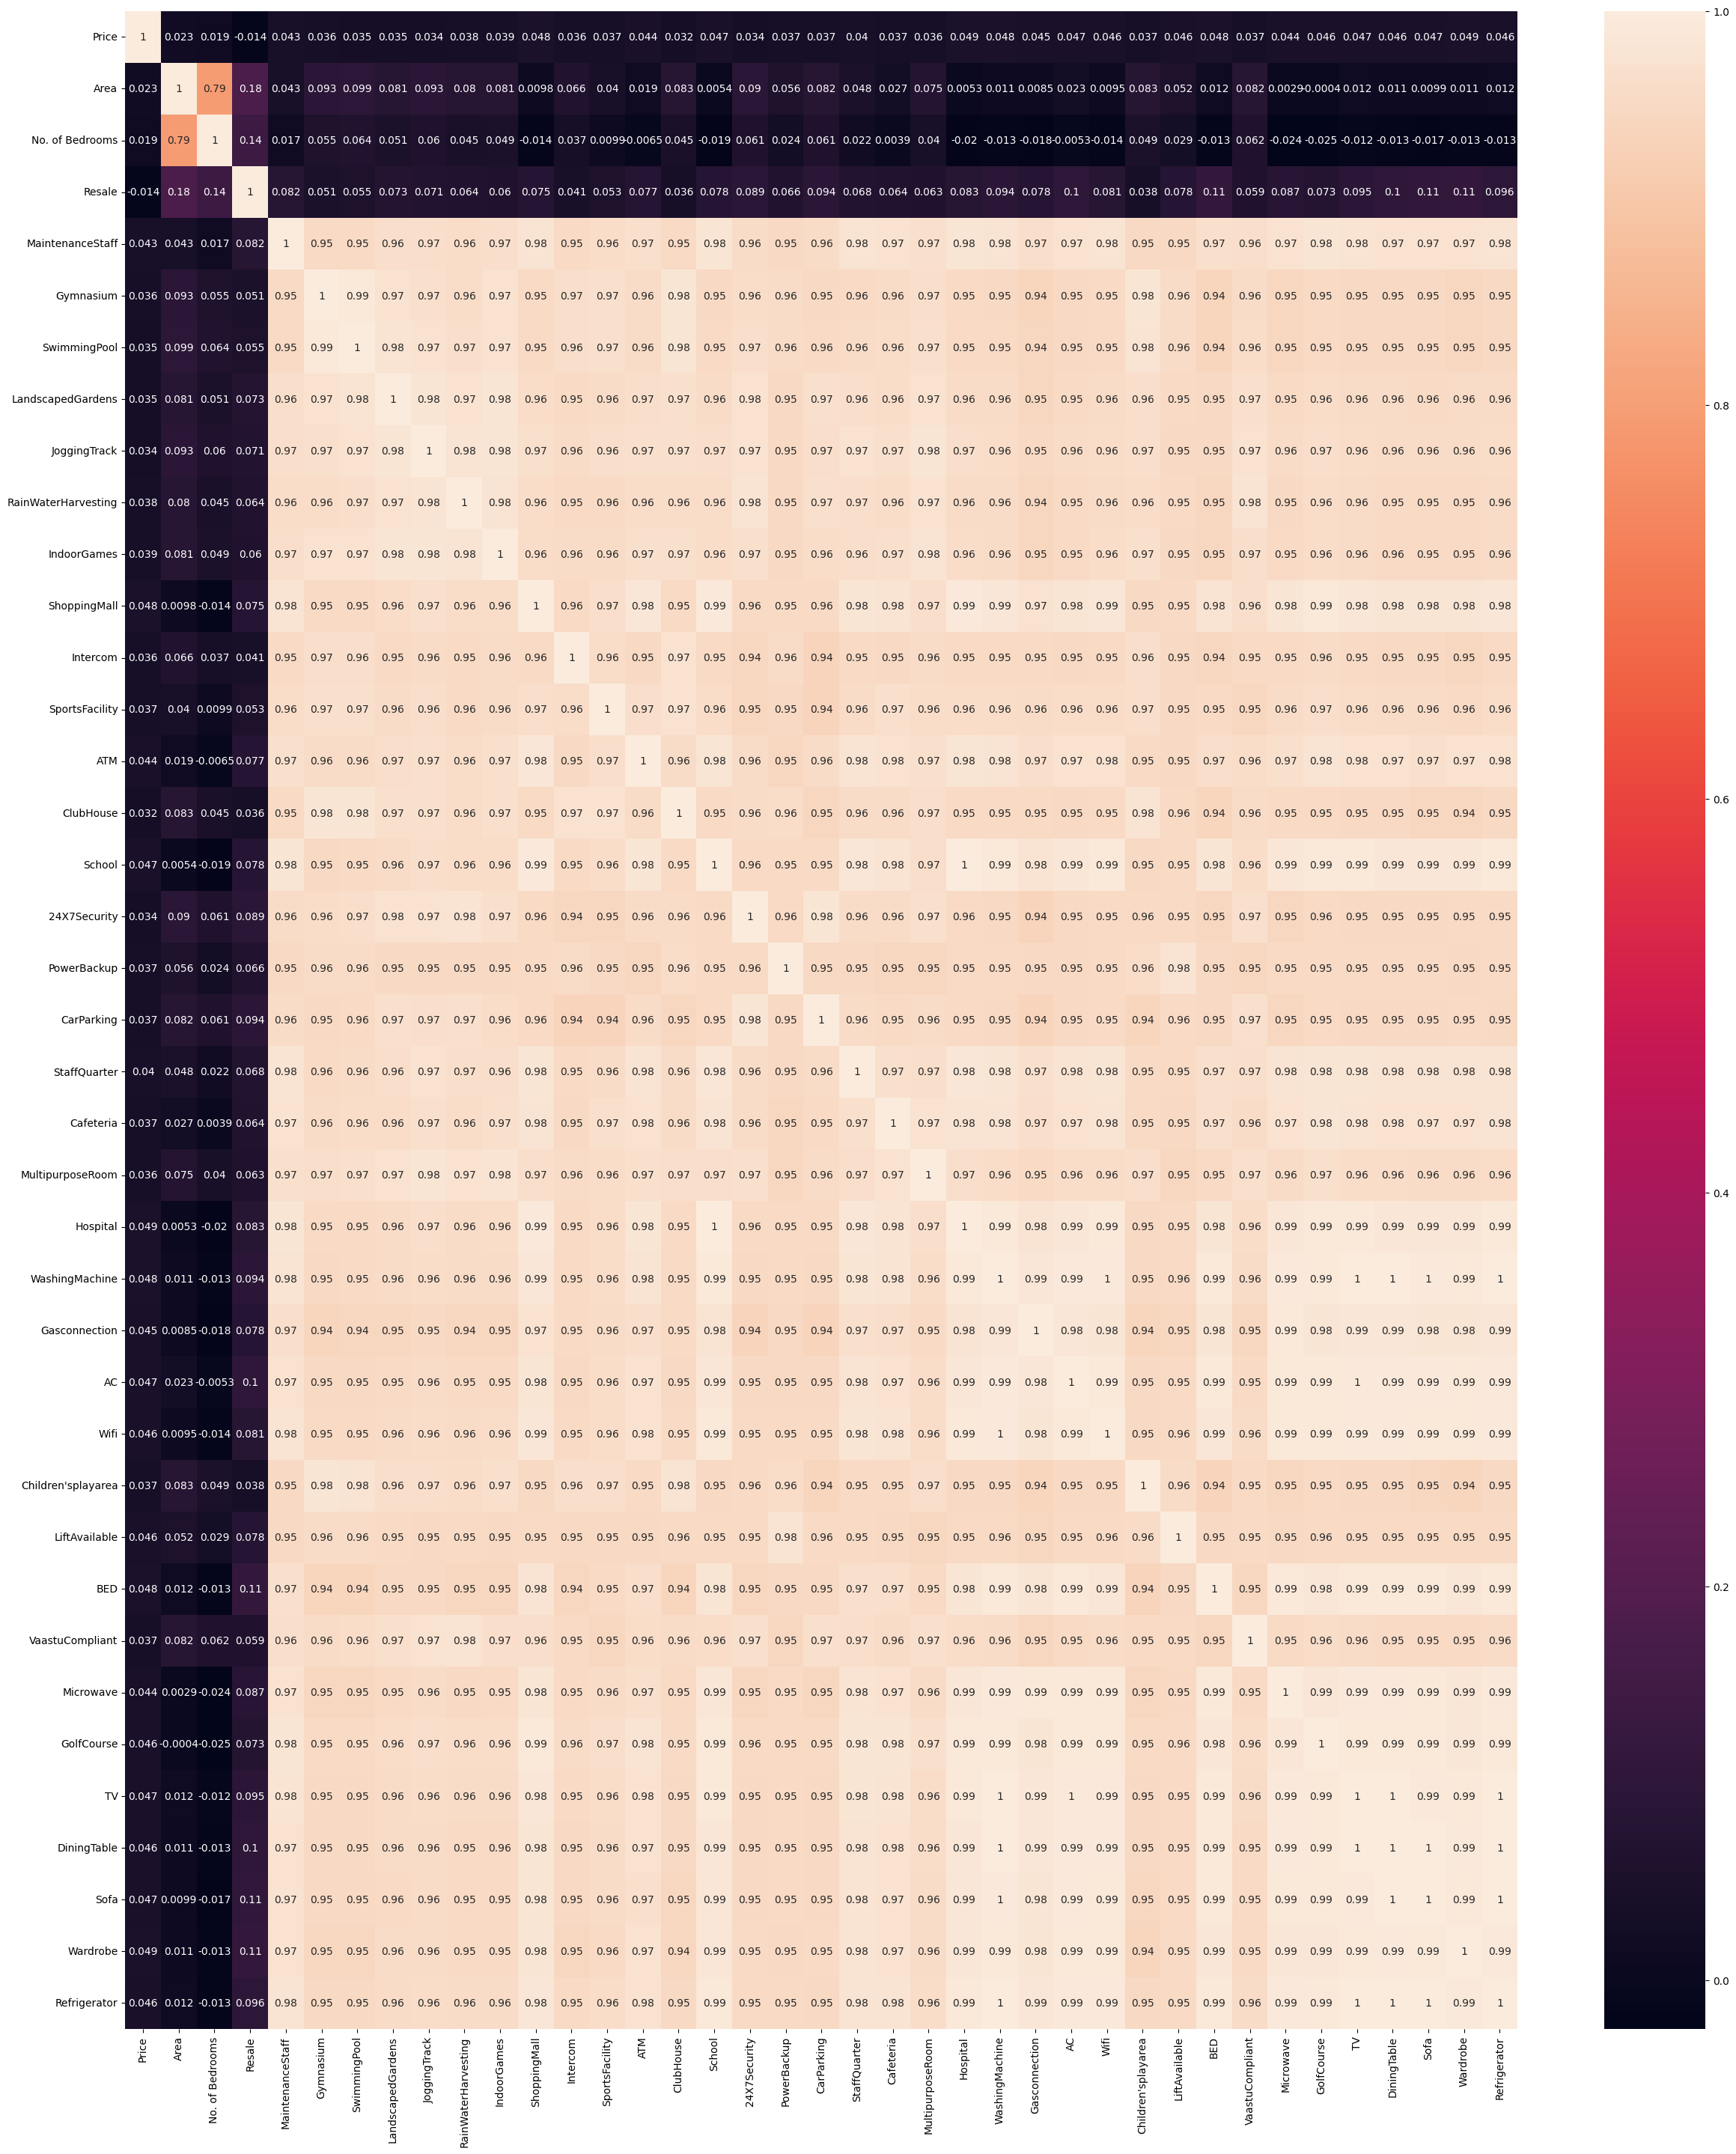

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_merged = df4.select_dtypes(exclude='object')
plt.figure(figsize=(30,35))
sns.heatmap(heatmap_merged.corr(),annot=True)

<Axes: >

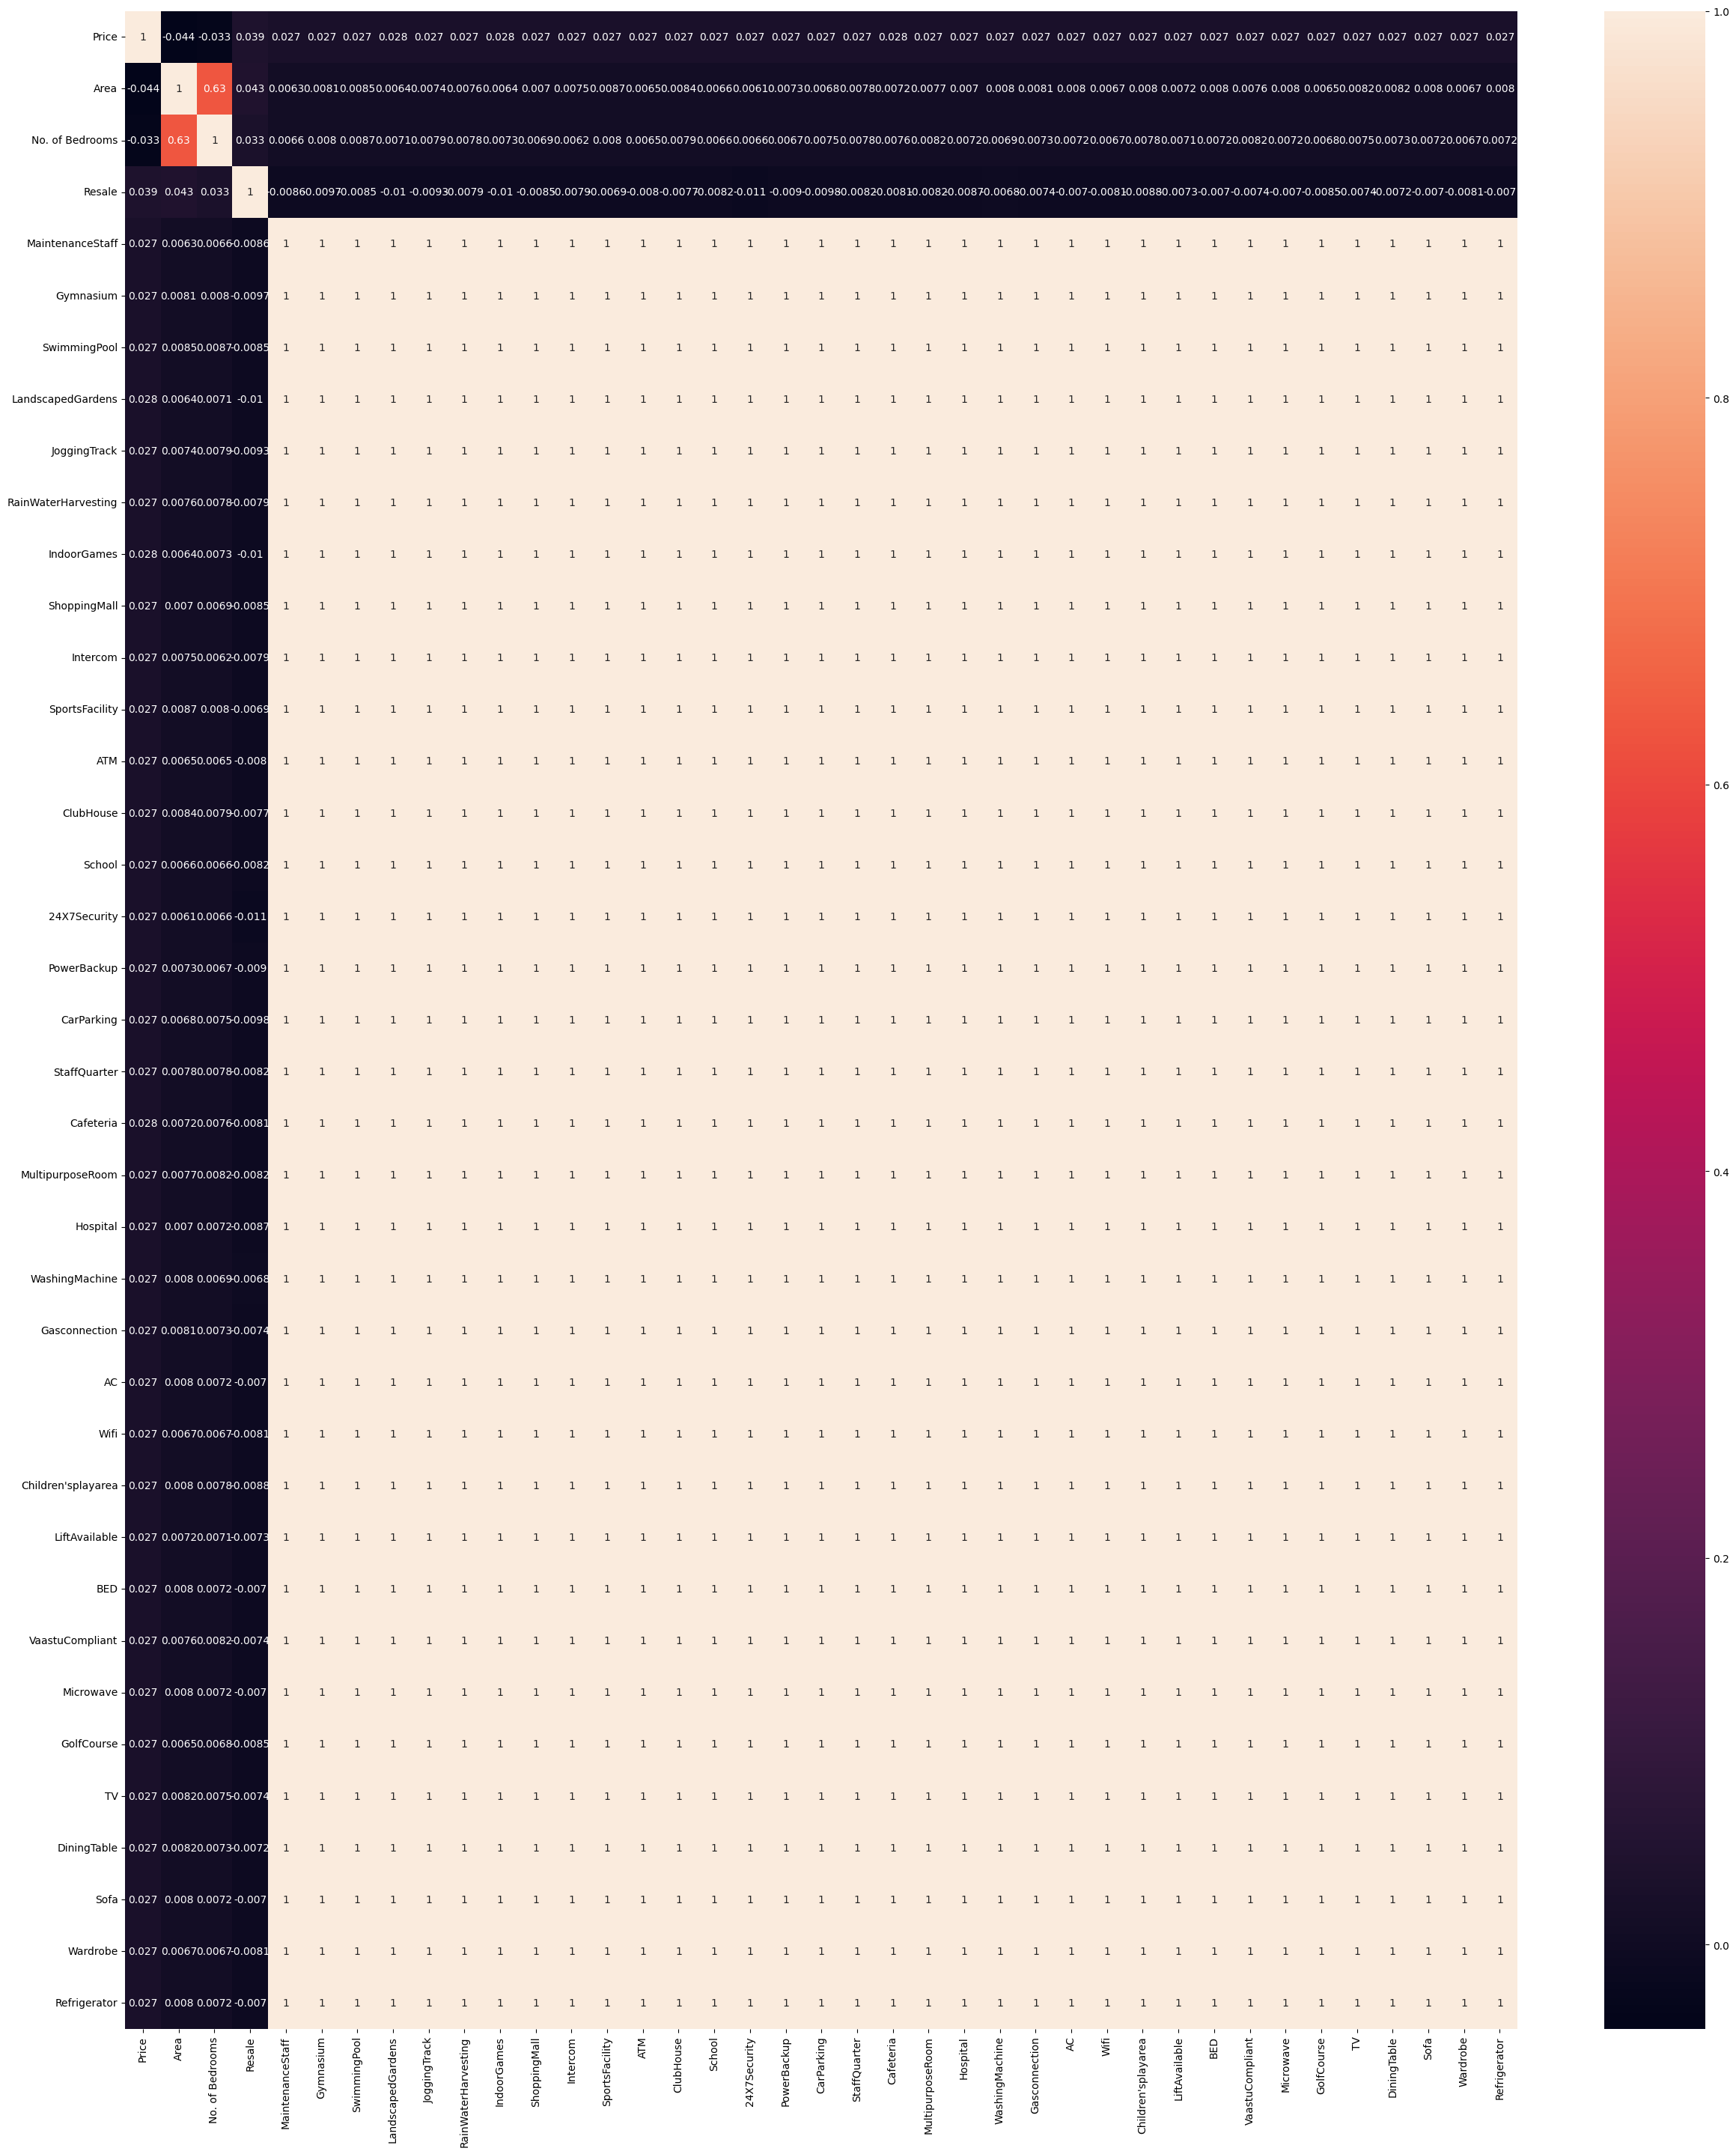

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_merged = df5.select_dtypes(exclude='object')
plt.figure(figsize=(30,35))
sns.heatmap(heatmap_merged.corr(),annot=True)

<Axes: >

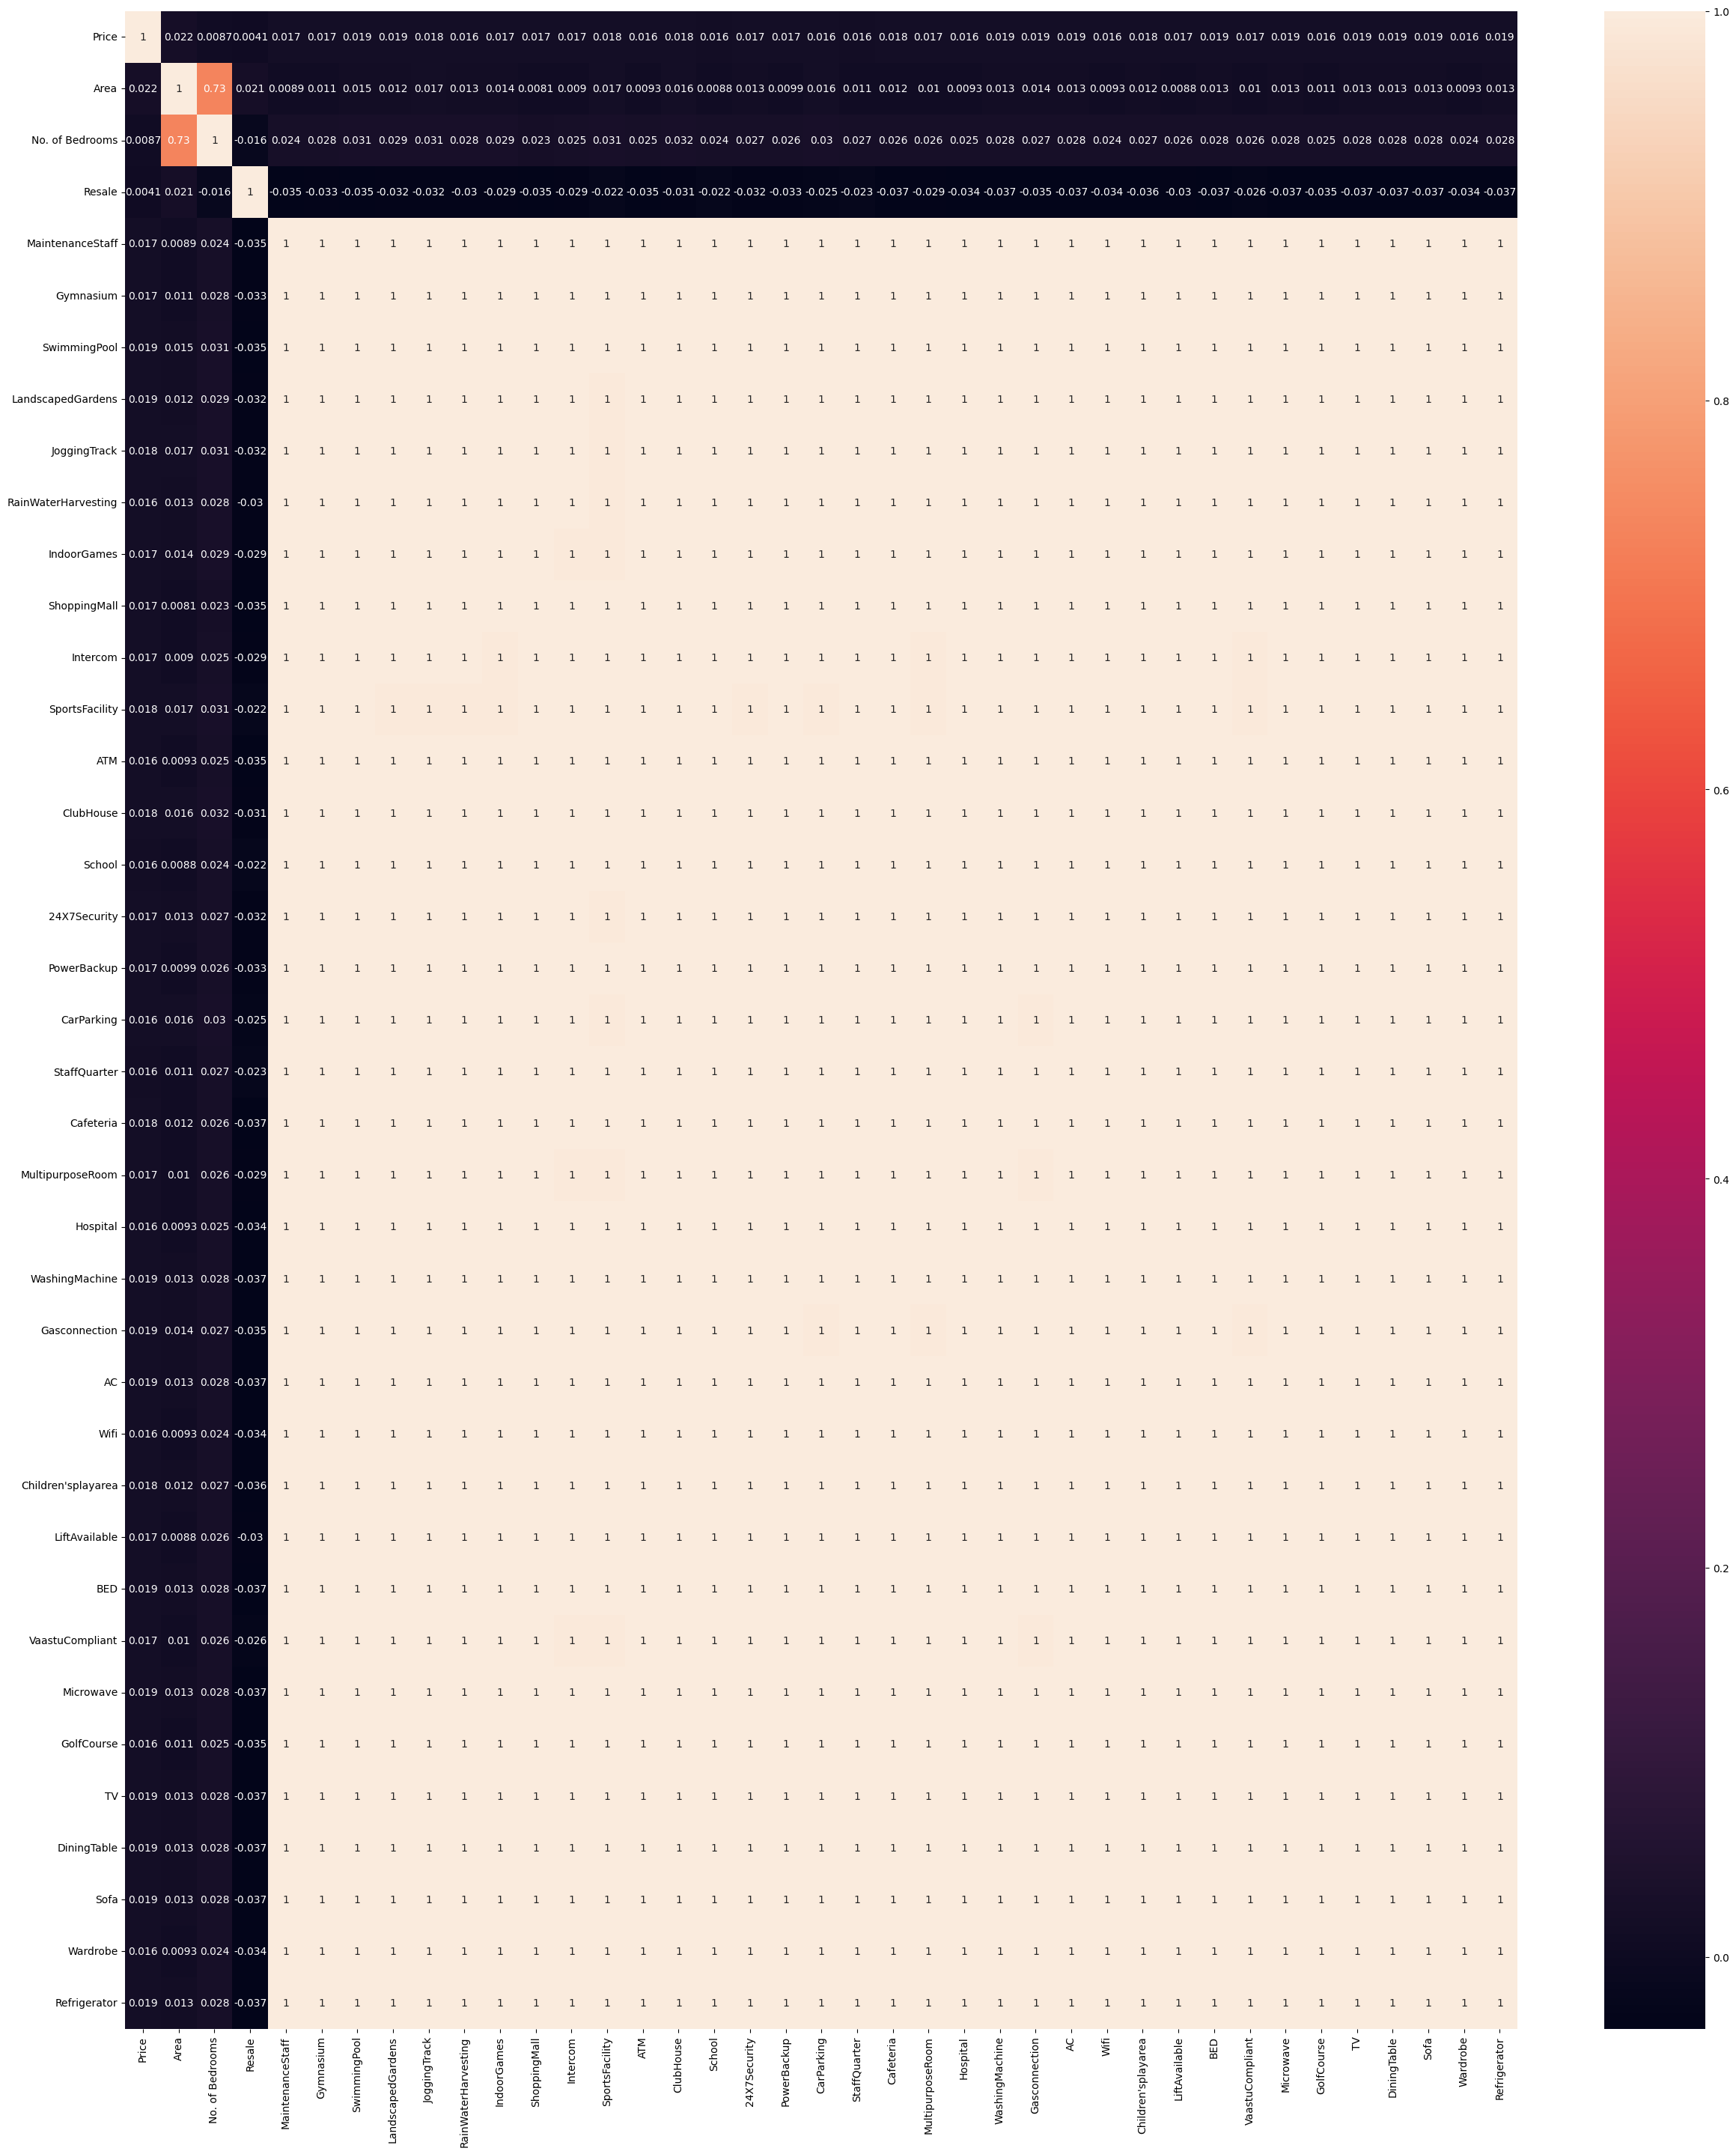

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_merged = df6.select_dtypes(exclude='object')
plt.figure(figsize=(30,35))
sns.heatmap(heatmap_merged.corr(),annot=True)

<Axes: >

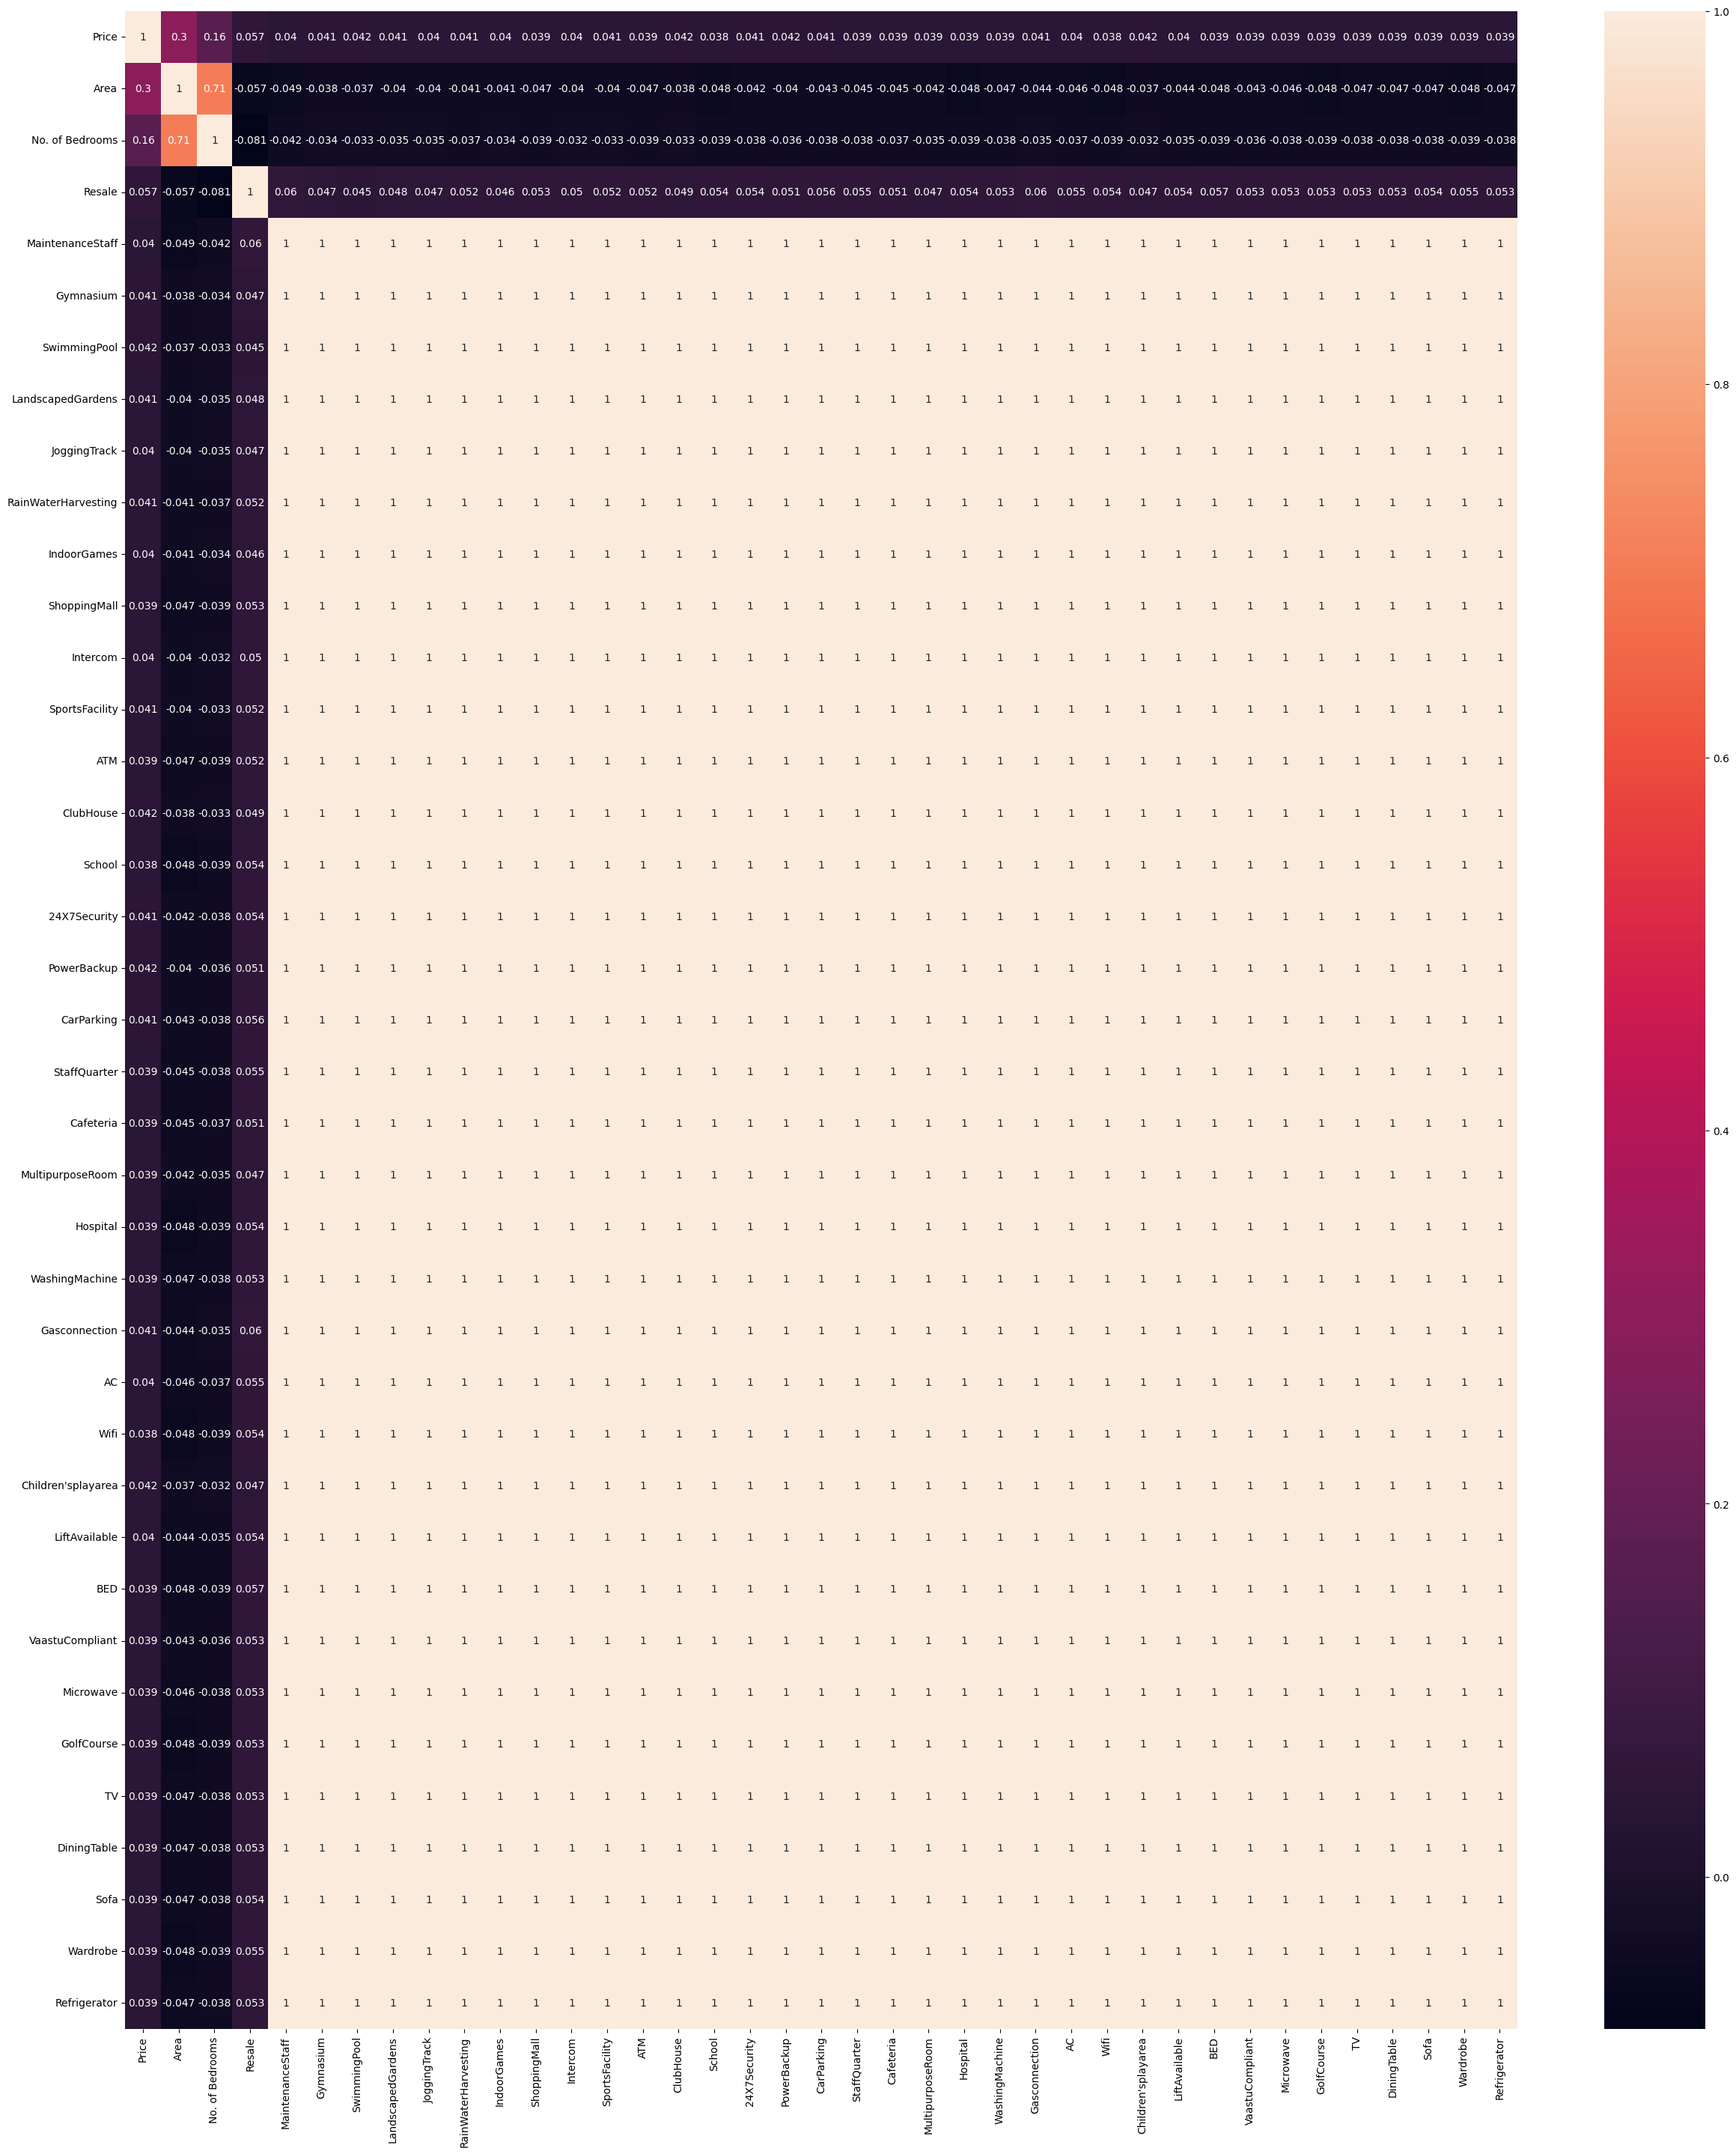

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_merged = df7.select_dtypes(exclude='object')
plt.figure(figsize=(30,35))
sns.heatmap(heatmap_merged.corr(),annot=True)

In [42]:

# # Assuming your CSV files are named file1.csv, file2.csv, ..., file6.csv
# file_paths = ['/kaggle/input/project/Bangalore.csv', '/kaggle/input/project/Chennai.csv', '/kaggle/input/project/Delhi.csv', '/kaggle/input/project/Hyderabad.csv', '/kaggle/input/project/Kolkata.csv', '/kaggle/input/project/Mumbai.csv']

# # Create an empty DataFrame to store the merged data
# merged = pd.DataFrame()

# # Loop through the files and concatenate them row-wise
# for file_path in file_paths:
#     df = pd.read_csv(file_path)
#     merged = pd.concat([merged, df], ignore_index=True)

# # Save the merged DataFrame to a new CSV file
# merged.to_csv('merged_file.csv', index=False)


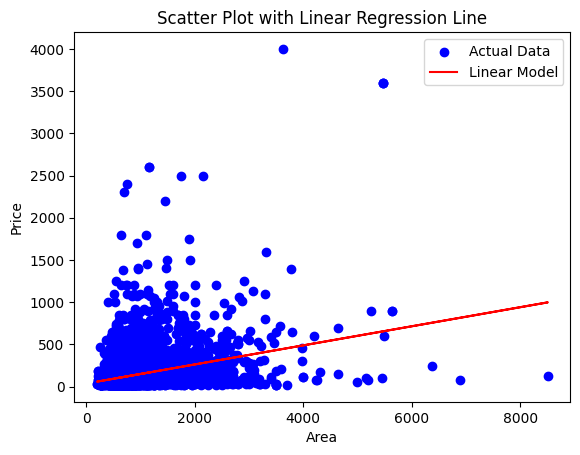

In [43]:
from sklearn.model_selection import train_test_split

# Load your dataset into a DataFrame (replace 'your_data.csv' with your actual data file)
# Extract the 'Area' feature as the independent variable and 'Price' as the target variable
X = df1[['Area']]
y = df1['Price']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Visualize the scatter plot and the linear regression line
plt.scatter(X_train, y_train, label='Actual Data', color='blue')
plt.plot(X_train, model.predict(X_train), color='red', label='Linear Model')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.title('Scatter Plot with Linear Regression Line')
plt.show()

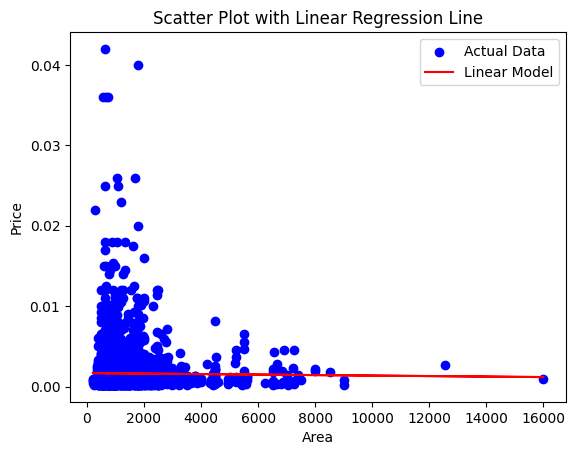

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming your DataFrame is df2
# Extract the 'Area' feature as the independent variable and 'Price' as the target variable
X = df2[['Area']]
y = df2['Price']

# Drop rows with NaN values in the target variable
df2_cleaned = df2.dropna(subset=['Price'])

# Split the cleaned data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(
    df2_cleaned[['Area']], df2_cleaned['Price'], test_size=0.2, random_state=42
)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Visualize the scatter plot and the linear regression line
plt.scatter(X_train, y_train, label='Actual Data', color='blue')
plt.plot(X_train, model.predict(X_train), color='red', label='Linear Model')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.title('Scatter Plot with Linear Regression Line')
plt.show()


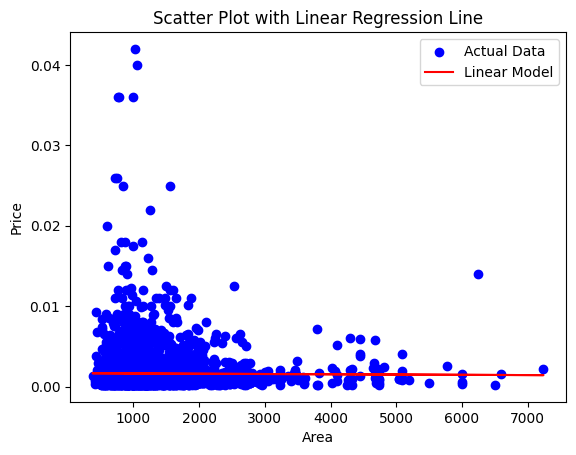

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming your DataFrame is df3
# Extract the 'Area' feature as the independent variable and 'Price' as the target variable
X = df3[['Area']]
y = df3['Price']

# Combine X and y into a single DataFrame
df_combined = pd.concat([X, y], axis=1)

# Drop rows with NaN values in any column
df_combined = df_combined.dropna()

# Extract X and y after handling NaN values
X = df_combined[['Area']]
y = df_combined['Price']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Visualize the scatter plot and the linear regression line
plt.scatter(X_train, y_train, label='Actual Data', color='blue')
plt.plot(X_train, model.predict(X_train), color='red', label='Linear Model')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.title('Scatter Plot with Linear Regression Line')
plt.show()


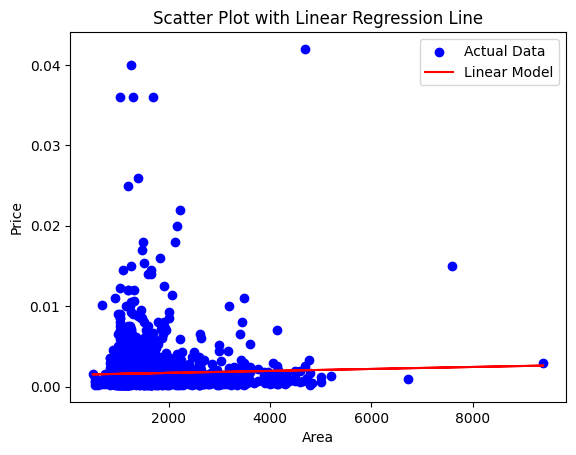

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming your DataFrame is df4
# Extract the 'Area' feature as the independent variable and 'Price' as the target variable
X = df4[['Area']]
y = df4['Price']

# Combine X and y into a single DataFrame
df_combined = pd.concat([X, y], axis=1)

# Drop rows with NaN values in any column
df_combined = df_combined.dropna()

# Extract X and y after handling NaN values
X = df_combined[['Area']]
y = df_combined['Price']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Visualize the scatter plot and the linear regression line
plt.scatter(X_train, y_train, label='Actual Data', color='blue')
plt.plot(X_train, model.predict(X_train), color='red', label='Linear Model')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.title('Scatter Plot with Linear Regression Line')
plt.show()


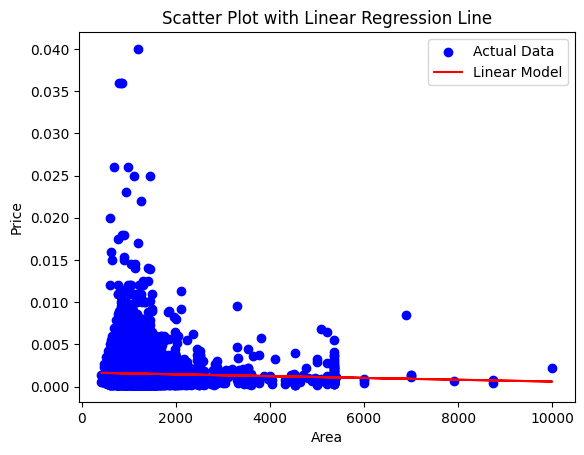

In [47]:
import numpy as np  # Add this import statement

# Assuming your DataFrame is df5
# Extract the 'Area' feature as the independent variable and 'Price' as the target variable
X = df5['Area'].values.reshape(-1, 1)  # Reshape to a 2D array
y = df5['Price']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Visualize the scatter plot and the linear regression line
plt.scatter(X_train, y_train, label='Actual Data', color='blue')
plt.plot(X_train, model.predict(X_train), color='red', label='Linear Model')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.title('Scatter Plot with Linear Regression Line')
plt.show()


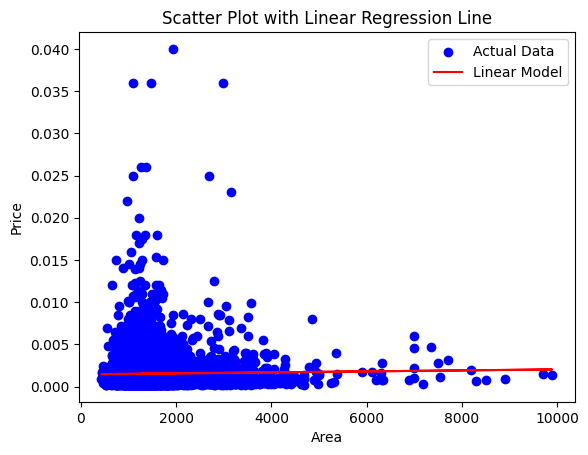

In [48]:
# Drop rows with NaN values in 'Price'
df6_cleaned = df6.dropna(subset=['Price'])

# Extract the 'Area' feature as the independent variable and 'Price' as the target variable
X = df6_cleaned[['Area']]
y = df6_cleaned['Price']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Visualize the scatter plot and the linear regression line
plt.scatter(X_train, y_train, label='Actual Data', color='blue')
plt.plot(X_train, model.predict(X_train), color='red', label='Linear Model')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.title('Scatter Plot with Linear Regression Line')
plt.show()


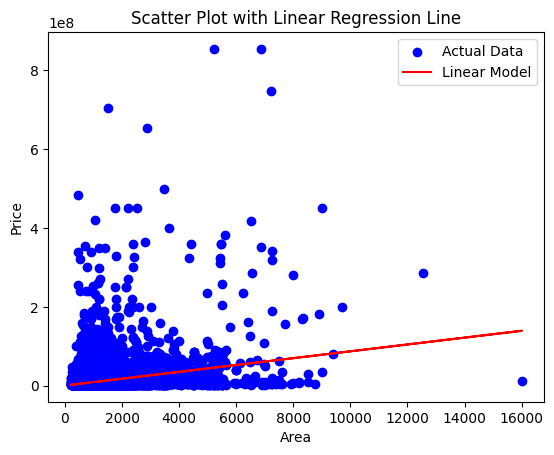

In [49]:
# MERGED

df7 = pd.read_csv('/kaggle/working/merged_file.csv')

# Load your dataset into a DataFrame (replace 'your_data.csv' with your actual data file)
# Extract the 'Area' feature as the independent variable and 'Price' as the target variable
X = df7[['Area']]
y = df7['Price']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Visualize the scatter plot and the linear regression line
plt.scatter(X_train, y_train, label='Actual Data', color='blue')
plt.plot(X_train, model.predict(X_train), color='red', label='Linear Model')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.title('Scatter Plot with Linear Regression Line')
plt.show()

Accuracy: 0.9219001610305958
Confusion Matrix:
[[1145    0]
 [  97    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1145
           1       1.00      0.00      0.00        97

    accuracy                           0.92      1242
   macro avg       0.96      0.50      0.48      1242
weighted avg       0.93      0.92      0.88      1242



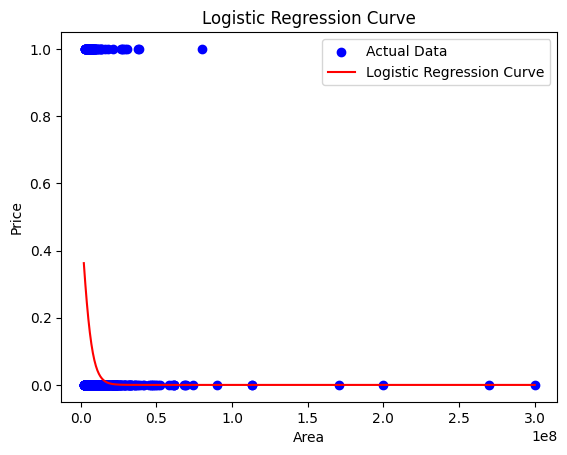

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load your dataset into a DataFrame (replace 'your_data.csv' with your actual data file)
data = pd.read_csv('/kaggle/input/project/Bangalore.csv')

# Extract the 'Number_of_Beds' feature as the independent variable and 'Sell' as the binary target variable
X = data['Price'].values.reshape(-1, 1)
y = data['Resale']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model with an increased number of iterations
logistic_regressor = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logistic_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_regressor.predict(X_test)

# Calculate accuracy and create a confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Generate a classification report with zero_division parameter
classification_rep = classification_report(y_test, y_pred, zero_division=1)

# Print the accuracy, confusion matrix, and classification report
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

# Plotting the logistic regression curve
x_values = np.linspace(X.min(), X.max(), 300)
y_proba = logistic_regressor.predict_proba(x_values.reshape(-1, 1))[:, 1]

plt.scatter(X_test, y_test, label='Actual Data', color='blue')
plt.plot(x_values, y_proba, label='Logistic Regression Curve', color='red')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.title('Logistic Regression Curve')
plt.show()


Accuracy: 0.8993020937188435
Confusion Matrix:
[[902   0]
 [101   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       902
           1       1.00      0.00      0.00       101

    accuracy                           0.90      1003
   macro avg       0.95      0.50      0.47      1003
weighted avg       0.91      0.90      0.85      1003



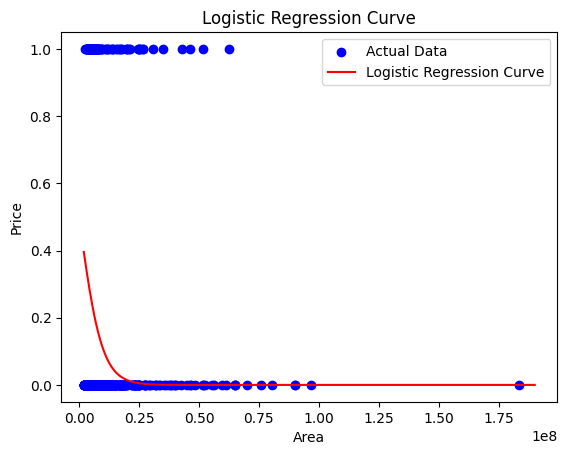

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load your dataset into a DataFrame (replace 'your_data.csv' with your actual data file)
data = pd.read_csv('/kaggle/input/project/Chennai.csv')

X = data['Price'].values.reshape(-1, 1)
y = data['Resale']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model with an increased number of iterations
logistic_regressor = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logistic_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_regressor.predict(X_test)

# Calculate accuracy and create a confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Generate a classification report with zero_division parameter
classification_rep = classification_report(y_test, y_pred, zero_division=1)

# Print the accuracy, confusion matrix, and classification report
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

# Plotting the logistic regression curve
x_values = np.linspace(X.min(), X.max(), 300)
y_proba = logistic_regressor.predict_proba(x_values.reshape(-1, 1))[:, 1]

plt.scatter(X_test, y_test, label='Actual Data', color='blue')
plt.plot(x_values, y_proba, label='Logistic Regression Curve', color='red')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.title('Logistic Regression Curve')
plt.show()


Accuracy: 0.817
Confusion Matrix:
[[  0 183]
 [  0 817]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       183
           1       0.82      1.00      0.90       817

    accuracy                           0.82      1000
   macro avg       0.91      0.50      0.45      1000
weighted avg       0.85      0.82      0.73      1000



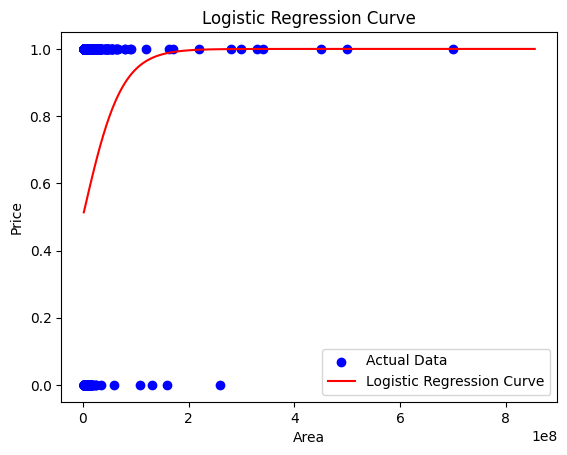

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load your dataset into a DataFrame (replace 'your_data.csv' with your actual data file)
data = pd.read_csv('/kaggle/input/project/Delhi.csv')

# Extract the 'Number_of_Beds' feature as the independent variable and 'Sell' as the binary target variable
X = data['Price'].values.reshape(-1, 1)
y = data['Resale']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model with an increased number of iterations
logistic_regressor = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logistic_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_regressor.predict(X_test)

# Calculate accuracy and create a confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Generate a classification report with zero_division parameter
classification_rep = classification_report(y_test, y_pred, zero_division=1)

# Print the accuracy, confusion matrix, and classification report
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

# Plotting the logistic regression curve
x_values = np.linspace(X.min(), X.max(), 300)
y_proba = logistic_regressor.predict_proba(x_values.reshape(-1, 1))[:, 1]

plt.scatter(X_test, y_test, label='Actual Data', color='blue')
plt.plot(x_values, y_proba, label='Logistic Regression Curve', color='red')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.title('Logistic Regression Curve')
plt.show()


Accuracy: 0.7738095238095238
Confusion Matrix:
[[390   0]
 [114   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       390
           1       1.00      0.00      0.00       114

    accuracy                           0.77       504
   macro avg       0.89      0.50      0.44       504
weighted avg       0.82      0.77      0.68       504



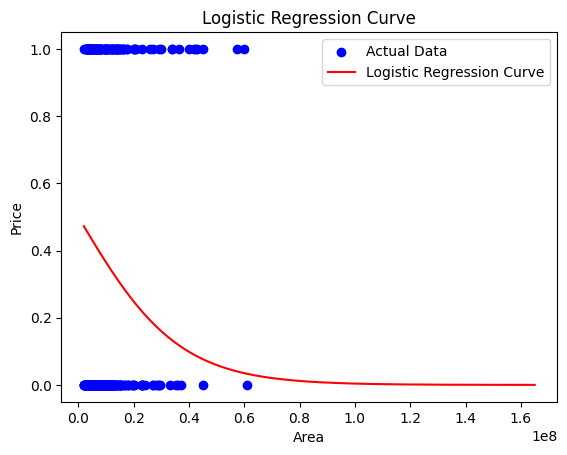

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load your dataset into a DataFrame (replace 'your_data.csv' with your actual data file)
data = pd.read_csv('/kaggle/input/project/Hyderabad.csv')

X = data['Price'].values.reshape(-1, 1)
y = data['Resale']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model with an increased number of iterations
logistic_regressor = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logistic_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_regressor.predict(X_test)

# Calculate accuracy and create a confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Generate a classification report with zero_division parameter
classification_rep = classification_report(y_test, y_pred, zero_division=1)

# Print the accuracy, confusion matrix, and classification report
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

# Plotting the logistic regression curve
x_values = np.linspace(X.min(), X.max(), 300)
y_proba = logistic_regressor.predict_proba(x_values.reshape(-1, 1))[:, 1]

plt.scatter(X_test, y_test, label='Actual Data', color='blue')
plt.plot(x_values, y_proba, label='Logistic Regression Curve', color='red')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.title('Logistic Regression Curve')
plt.show()


Accuracy: 0.6866359447004609
Confusion Matrix:
[[894   0]
 [408   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      1.00      0.81       894
           1       1.00      0.00      0.00       408

    accuracy                           0.69      1302
   macro avg       0.84      0.50      0.41      1302
weighted avg       0.78      0.69      0.56      1302



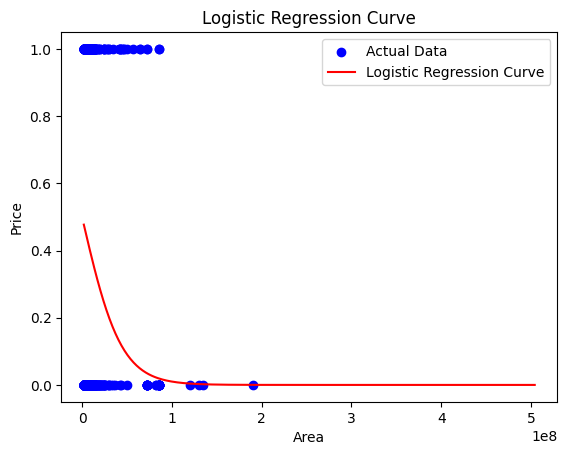

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load your dataset into a DataFrame (replace 'your_data.csv' with your actual data file)
data = pd.read_csv('/kaggle/input/project/Kolkata.csv')

X = data['Price'].values.reshape(-1, 1)
y = data['Resale']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model with an increased number of iterations
logistic_regressor = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logistic_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_regressor.predict(X_test)

# Calculate accuracy and create a confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Generate a classification report with zero_division parameter
classification_rep = classification_report(y_test, y_pred, zero_division=1)

# Print the accuracy, confusion matrix, and classification report
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

# Plotting the logistic regression curve
x_values = np.linspace(X.min(), X.max(), 300)
y_proba = logistic_regressor.predict_proba(x_values.reshape(-1, 1))[:, 1]

plt.scatter(X_test, y_test, label='Actual Data', color='blue')
plt.plot(x_values, y_proba, label='Logistic Regression Curve', color='red')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.title('Logistic Regression Curve')
plt.show()


Accuracy: 0.6690414507772021
Confusion Matrix:
[[   0  511]
 [   0 1033]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       511
           1       0.67      1.00      0.80      1033

    accuracy                           0.67      1544
   macro avg       0.83      0.50      0.40      1544
weighted avg       0.78      0.67      0.54      1544



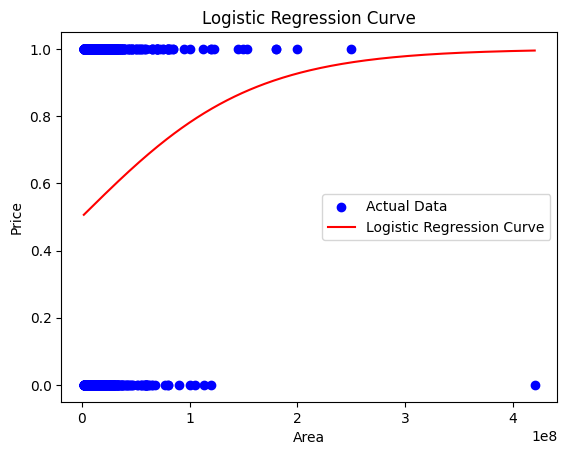

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load your dataset into a DataFrame (replace 'your_data.csv' with your actual data file)
data = pd.read_csv('/kaggle/input/project/Mumbai.csv')

X = data['Price'].values.reshape(-1, 1)
y = data['Resale']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model with an increased number of iterations
logistic_regressor = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logistic_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_regressor.predict(X_test)

# Calculate accuracy and create a confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Generate a classification report with zero_division parameter
classification_rep = classification_report(y_test, y_pred, zero_division=1)

# Print the accuracy, confusion matrix, and classification report
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

# Plotting the logistic regression curve
x_values = np.linspace(X.min(), X.max(), 300)
y_proba = logistic_regressor.predict_proba(x_values.reshape(-1, 1))[:, 1]

plt.scatter(X_test, y_test, label='Actual Data', color='blue')
plt.plot(x_values, y_proba, label='Logistic Regression Curve', color='red')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.title('Logistic Regression Curve')
plt.show()


Accuracy: 0.6690414507772021
Confusion Matrix:
[[   0  511]
 [   0 1033]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       511
           1       0.67      1.00      0.80      1033

    accuracy                           0.67      1544
   macro avg       0.83      0.50      0.40      1544
weighted avg       0.78      0.67      0.54      1544



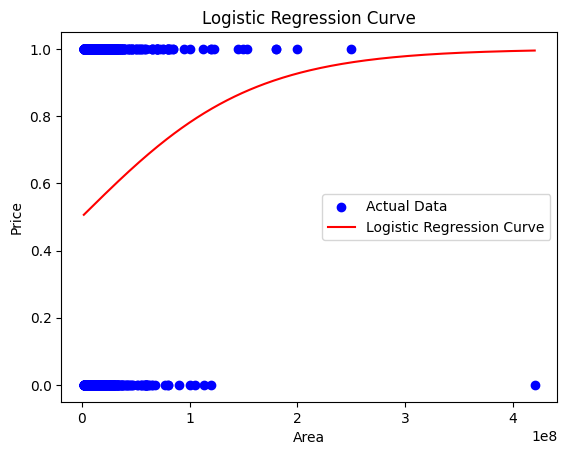

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load your dataset into a DataFrame (replace 'your_data.csv' with your actual data file)
data = pd.read_csv('/kaggle/input/project/Mumbai.csv')

X = data['Price'].values.reshape(-1, 1)
y = data['Resale']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model with an increased number of iterations
logistic_regressor = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logistic_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_regressor.predict(X_test)

# Calculate accuracy and create a confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Generate a classification report with zero_division parameter
classification_rep = classification_report(y_test, y_pred, zero_division=1)

# Print the accuracy, confusion matrix, and classification report
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

# Plotting the logistic regression curve
x_values = np.linspace(X.min(), X.max(), 300)
y_proba = logistic_regressor.predict_proba(x_values.reshape(-1, 1))[:, 1]

plt.scatter(X_test, y_test, label='Actual Data', color='blue')
plt.plot(x_values, y_proba, label='Logistic Regression Curve', color='red')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.title('Logistic Regression Curve')
plt.show()


0:	learn: 197.8570194	test: 218.1222054	best: 218.1222054 (0)	total: 57.5ms	remaining: 5.69s
10:	learn: 177.4874370	test: 208.0622789	best: 208.0622789 (10)	total: 102ms	remaining: 822ms
20:	learn: 167.7315022	test: 202.6535450	best: 202.6535450 (20)	total: 136ms	remaining: 512ms
30:	learn: 164.2414298	test: 201.2045946	best: 201.2045946 (30)	total: 171ms	remaining: 381ms
40:	learn: 162.1340564	test: 200.0410196	best: 200.0410196 (40)	total: 208ms	remaining: 299ms
50:	learn: 160.1713415	test: 198.3131839	best: 198.3131839 (50)	total: 240ms	remaining: 230ms
60:	learn: 159.0250622	test: 197.8256563	best: 197.7891678 (59)	total: 269ms	remaining: 172ms
70:	learn: 157.9096409	test: 197.6287411	best: 197.5287073 (68)	total: 298ms	remaining: 122ms
80:	learn: 156.7680418	test: 197.1579907	best: 197.1579907 (80)	total: 329ms	remaining: 77.1ms
90:	learn: 155.8077848	test: 196.7881724	best: 196.7881724 (90)	total: 360ms	remaining: 35.6ms
99:	learn: 154.9015427	test: 196.1585792	best: 196.1585792 

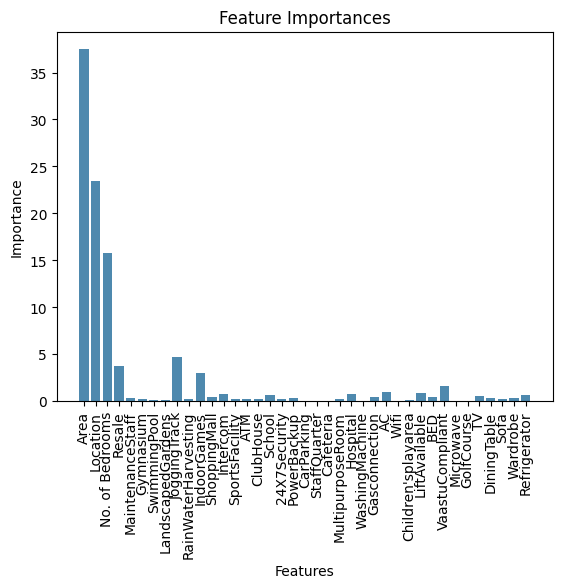

In [57]:
! pip install catboost

from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame containing all the variables
# Extracting features and target variable
X = df1.drop('Price', axis=1)  # Use all columns except 'Price' as features
y = df1['Price']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CatBoost Regressor model
model = CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, loss_function='RMSE', cat_features=list(X.select_dtypes(include=['object']).columns))

# Fit the model to the training data
model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=10)

# Get feature importances
feature_importances = model.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

# Visualize feature importances
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()


0:	learn: 0.0024293	test: 0.0017844	best: 0.0017844 (0)	total: 2.74ms	remaining: 271ms
10:	learn: 0.0024064	test: 0.0017827	best: 0.0017827 (10)	total: 26.8ms	remaining: 216ms
20:	learn: 0.0023968	test: 0.0017829	best: 0.0017826 (19)	total: 49.9ms	remaining: 188ms
30:	learn: 0.0023788	test: 0.0017829	best: 0.0017826 (19)	total: 75.8ms	remaining: 169ms
40:	learn: 0.0023611	test: 0.0017856	best: 0.0017821 (36)	total: 100ms	remaining: 144ms
50:	learn: 0.0023431	test: 0.0017904	best: 0.0017821 (36)	total: 128ms	remaining: 123ms
60:	learn: 0.0023323	test: 0.0017904	best: 0.0017821 (36)	total: 154ms	remaining: 98.7ms
70:	learn: 0.0023195	test: 0.0017904	best: 0.0017821 (36)	total: 178ms	remaining: 72.8ms
80:	learn: 0.0023088	test: 0.0017906	best: 0.0017821 (36)	total: 202ms	remaining: 47.4ms
90:	learn: 0.0022999	test: 0.0017927	best: 0.0017821 (36)	total: 226ms	remaining: 22.4ms
99:	learn: 0.0022861	test: 0.0018015	best: 0.0017821 (36)	total: 248ms	remaining: 0us

bestTest = 0.001782091917
b

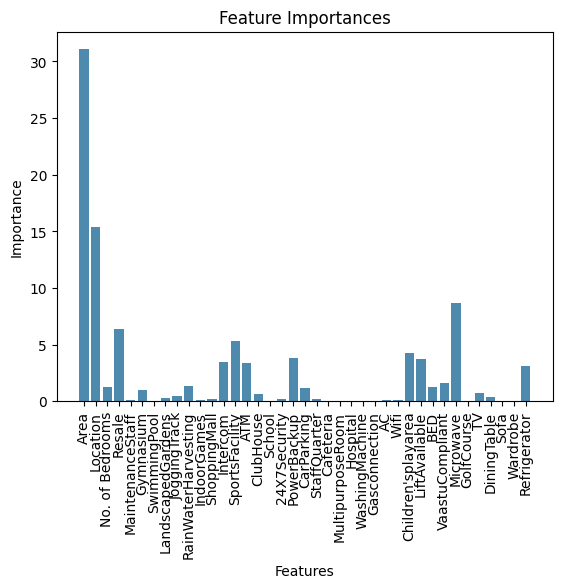

In [58]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame containing all the variables
# Extracting features and target variable
X = df2.drop('Price', axis=1)  # Use all columns except 'Price' as features
y = df2['Price']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CatBoost Regressor model
model = CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, loss_function='RMSE', cat_features=list(X.select_dtypes(include=['object']).columns))

# Fit the model to the training data
model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=10)

# Get feature importances
feature_importances = model.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

# Visualize feature importances
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()


0:	learn: 0.0023576	test: 0.0020510	best: 0.0020510 (0)	total: 6.28ms	remaining: 622ms
10:	learn: 0.0022926	test: 0.0020506	best: 0.0020429 (6)	total: 32.4ms	remaining: 262ms
20:	learn: 0.0022497	test: 0.0020647	best: 0.0020429 (6)	total: 59.5ms	remaining: 224ms
30:	learn: 0.0022262	test: 0.0020765	best: 0.0020429 (6)	total: 86.3ms	remaining: 192ms
40:	learn: 0.0021984	test: 0.0021033	best: 0.0020429 (6)	total: 114ms	remaining: 164ms
50:	learn: 0.0021766	test: 0.0021150	best: 0.0020429 (6)	total: 138ms	remaining: 133ms
60:	learn: 0.0021624	test: 0.0021280	best: 0.0020429 (6)	total: 164ms	remaining: 105ms
70:	learn: 0.0021451	test: 0.0021313	best: 0.0020429 (6)	total: 190ms	remaining: 77.4ms
80:	learn: 0.0021310	test: 0.0021367	best: 0.0020429 (6)	total: 215ms	remaining: 50.5ms
90:	learn: 0.0021053	test: 0.0021514	best: 0.0020429 (6)	total: 242ms	remaining: 23.9ms
99:	learn: 0.0020977	test: 0.0021517	best: 0.0020429 (6)	total: 263ms	remaining: 0us

bestTest = 0.002042867434
bestIteratio

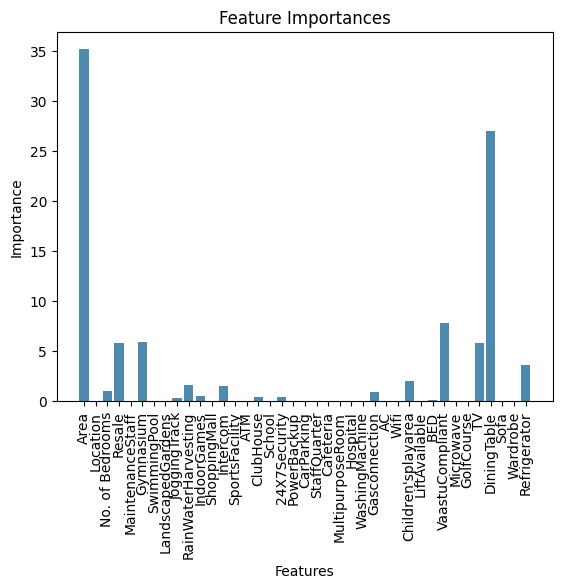

In [59]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame containing all the variables
# Extracting features and target variable
X = df3.drop('Price', axis=1)  # Use all columns except 'Price' as features
y = df3['Price']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CatBoost Regressor model
model = CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, loss_function='RMSE', cat_features=list(X.select_dtypes(include=['object']).columns))

# Fit the model to the training data
model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=10)

# Get feature importances
feature_importances = model.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

# Visualize feature importances
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()


0:	learn: 0.0028001	test: 0.0024687	best: 0.0024687 (0)	total: 2.39ms	remaining: 237ms
10:	learn: 0.0027291	test: 0.0024663	best: 0.0024663 (10)	total: 21.6ms	remaining: 175ms
20:	learn: 0.0026982	test: 0.0024753	best: 0.0024663 (10)	total: 40.9ms	remaining: 154ms
30:	learn: 0.0026587	test: 0.0024786	best: 0.0024663 (10)	total: 61ms	remaining: 136ms
40:	learn: 0.0026248	test: 0.0024757	best: 0.0024663 (10)	total: 81.7ms	remaining: 118ms
50:	learn: 0.0026038	test: 0.0024803	best: 0.0024663 (10)	total: 102ms	remaining: 97.6ms
60:	learn: 0.0025847	test: 0.0024838	best: 0.0024663 (10)	total: 117ms	remaining: 74.8ms
70:	learn: 0.0025582	test: 0.0024792	best: 0.0024663 (10)	total: 137ms	remaining: 56ms
80:	learn: 0.0025261	test: 0.0024912	best: 0.0024663 (10)	total: 154ms	remaining: 36.2ms
90:	learn: 0.0025046	test: 0.0024976	best: 0.0024663 (10)	total: 173ms	remaining: 17.1ms
99:	learn: 0.0024902	test: 0.0025014	best: 0.0024663 (10)	total: 191ms	remaining: 0us

bestTest = 0.002466336638
bes

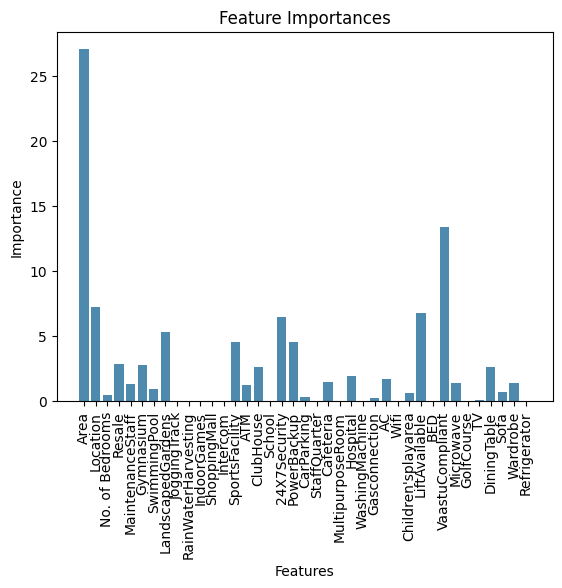

In [60]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame containing all the variables
# Extracting features and target variable
X = df4.drop('Price', axis=1)  # Use all columns except 'Price' as features
y = df4['Price']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CatBoost Regressor model
model = CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, loss_function='RMSE', cat_features=list(X.select_dtypes(include=['object']).columns))

# Fit the model to the training data
model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=10)

# Get feature importances
feature_importances = model.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

# Visualize feature importances
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()


0:	learn: 0.0021197	test: 0.0021179	best: 0.0021179 (0)	total: 3.64ms	remaining: 360ms
10:	learn: 0.0021161	test: 0.0021143	best: 0.0021143 (10)	total: 27.3ms	remaining: 221ms
20:	learn: 0.0021145	test: 0.0021129	best: 0.0021129 (20)	total: 49.8ms	remaining: 187ms
30:	learn: 0.0021129	test: 0.0021128	best: 0.0021128 (29)	total: 75.3ms	remaining: 168ms
40:	learn: 0.0021102	test: 0.0021120	best: 0.0021119 (36)	total: 101ms	remaining: 146ms
50:	learn: 0.0021074	test: 0.0021130	best: 0.0021119 (36)	total: 131ms	remaining: 125ms
60:	learn: 0.0021059	test: 0.0021135	best: 0.0021119 (36)	total: 154ms	remaining: 98.8ms
70:	learn: 0.0021042	test: 0.0021140	best: 0.0021119 (36)	total: 181ms	remaining: 73.8ms
80:	learn: 0.0021008	test: 0.0021151	best: 0.0021119 (36)	total: 208ms	remaining: 48.8ms
90:	learn: 0.0020962	test: 0.0021168	best: 0.0021119 (36)	total: 236ms	remaining: 23.3ms
99:	learn: 0.0020887	test: 0.0021195	best: 0.0021119 (36)	total: 264ms	remaining: 0us

bestTest = 0.002111934499
b

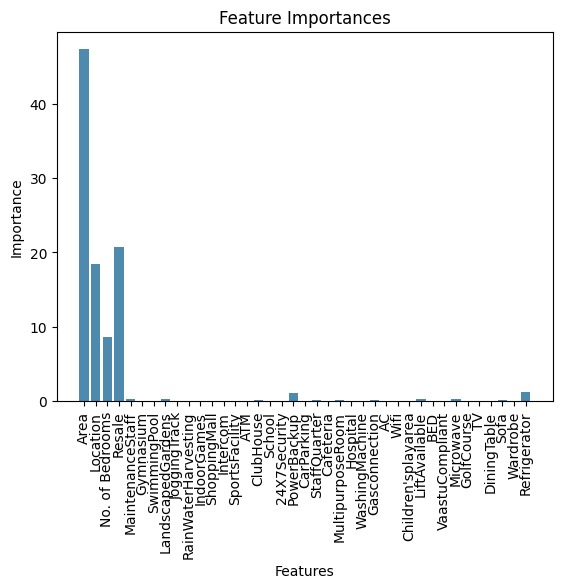

In [61]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame containing all the variables
# Extracting features and target variable
X = df5.drop('Price', axis=1)  # Use all columns except 'Price' as features
y = df5['Price']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CatBoost Regressor model
model = CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, loss_function='RMSE', cat_features=list(X.select_dtypes(include=['object']).columns))

# Fit the model to the training data
model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=10)

# Get feature importances
feature_importances = model.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

# Visualize feature importances
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()

0:	learn: 0.0021828	test: 0.0020309	best: 0.0020309 (0)	total: 4.82ms	remaining: 477ms
10:	learn: 0.0021410	test: 0.0020257	best: 0.0020257 (10)	total: 35.2ms	remaining: 285ms
20:	learn: 0.0021156	test: 0.0020278	best: 0.0020255 (11)	total: 63.7ms	remaining: 240ms
30:	learn: 0.0020953	test: 0.0020285	best: 0.0020255 (11)	total: 93.6ms	remaining: 208ms
40:	learn: 0.0020832	test: 0.0020286	best: 0.0020255 (11)	total: 121ms	remaining: 174ms
50:	learn: 0.0020692	test: 0.0020305	best: 0.0020255 (11)	total: 150ms	remaining: 144ms
60:	learn: 0.0020568	test: 0.0020322	best: 0.0020255 (11)	total: 177ms	remaining: 113ms
70:	learn: 0.0020497	test: 0.0020323	best: 0.0020255 (11)	total: 205ms	remaining: 83.6ms
80:	learn: 0.0020436	test: 0.0020334	best: 0.0020255 (11)	total: 230ms	remaining: 54ms
90:	learn: 0.0020296	test: 0.0020346	best: 0.0020255 (11)	total: 258ms	remaining: 25.5ms
99:	learn: 0.0020160	test: 0.0020360	best: 0.0020255 (11)	total: 285ms	remaining: 0us

bestTest = 0.00202548612
bestI

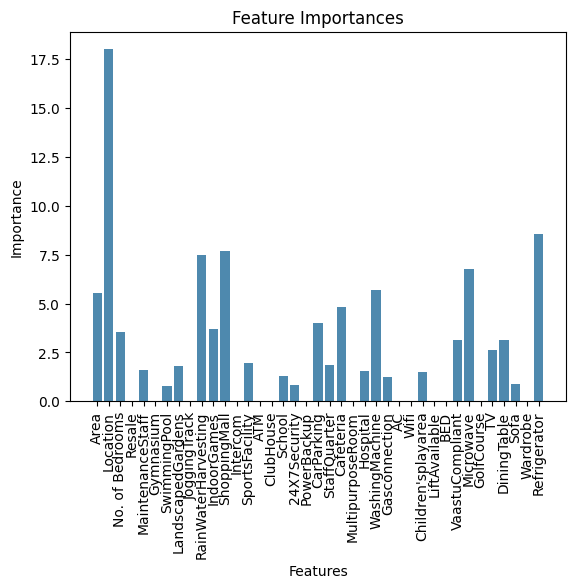

In [62]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame containing all the variables
# Extracting features and target variable
X = df6.drop('Price', axis=1)  # Use all columns except 'Price' as features
y = df6['Price']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CatBoost Regressor model
model = CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, loss_function='RMSE', cat_features=list(X.select_dtypes(include=['object']).columns))

# Fit the model to the training data
model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=10)

# Get feature importances
feature_importances = model.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

# Visualize feature importances
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()


0:	learn: 22469309.5396688	test: 24263885.3677898	best: 24263885.3677898 (0)	total: 17.2ms	remaining: 1.7s
10:	learn: 21260655.4371375	test: 23060685.1557196	best: 23060685.1557196 (10)	total: 138ms	remaining: 1.12s
20:	learn: 20606381.4078285	test: 22566759.2657307	best: 22566759.2657307 (20)	total: 256ms	remaining: 963ms
30:	learn: 20312804.7100039	test: 22382837.9187738	best: 22382837.9187738 (30)	total: 364ms	remaining: 809ms
40:	learn: 20124920.4435476	test: 22288160.3680638	best: 22288160.3680638 (40)	total: 472ms	remaining: 680ms
50:	learn: 19992623.2208888	test: 22260979.9201944	best: 22260612.5693652 (46)	total: 577ms	remaining: 555ms
60:	learn: 19907468.2347520	test: 22277472.6606721	best: 22255637.4956635 (52)	total: 679ms	remaining: 434ms
70:	learn: 19777061.7482112	test: 22269802.3679974	best: 22255512.7091418 (63)	total: 783ms	remaining: 320ms
80:	learn: 19691481.5643209	test: 22270996.9834445	best: 22255512.7091418 (63)	total: 877ms	remaining: 206ms
90:	learn: 19599482.4

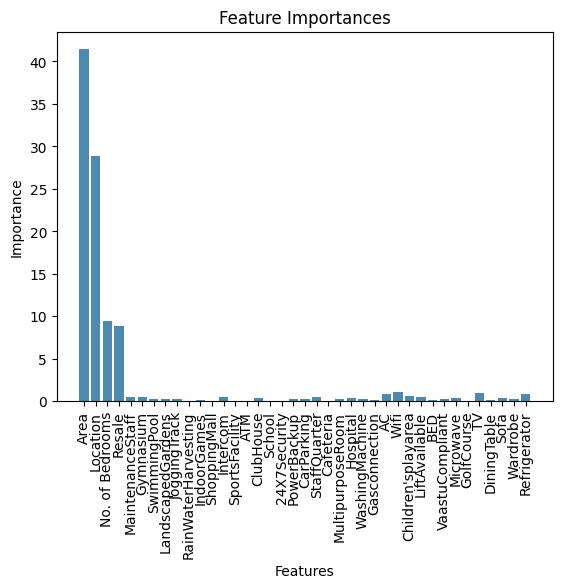

In [63]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame containing all the variables
# Extracting features and target variable
X = df7.drop('Price', axis=1)  # Use all columns except 'Price' as features
y = df7['Price']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CatBoost Regressor model
model = CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, loss_function='RMSE', cat_features=list(X.select_dtypes(include=['object']).columns))

# Fit the model to the training data
model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=10)

# Get feature importances
feature_importances = model.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

# Visualize feature importances
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()


0:	learn: 197.8570194	test: 218.1222054	best: 218.1222054 (0)	total: 3.81ms	remaining: 377ms
10:	learn: 177.4874370	test: 208.0622789	best: 208.0622789 (10)	total: 37.1ms	remaining: 300ms
20:	learn: 167.7315022	test: 202.6535450	best: 202.6535450 (20)	total: 68.8ms	remaining: 259ms
30:	learn: 164.2414298	test: 201.2045946	best: 201.2045946 (30)	total: 102ms	remaining: 228ms
40:	learn: 162.1340564	test: 200.0410196	best: 200.0410196 (40)	total: 136ms	remaining: 196ms
50:	learn: 160.1713415	test: 198.3131839	best: 198.3131839 (50)	total: 169ms	remaining: 162ms
60:	learn: 159.0250622	test: 197.8256563	best: 197.7891678 (59)	total: 202ms	remaining: 129ms
70:	learn: 157.9096409	test: 197.6287411	best: 197.5287073 (68)	total: 233ms	remaining: 95.3ms
80:	learn: 156.7680418	test: 197.1579907	best: 197.1579907 (80)	total: 265ms	remaining: 62.2ms
90:	learn: 155.8077848	test: 196.7881724	best: 196.7881724 (90)	total: 300ms	remaining: 29.6ms
99:	learn: 154.9015427	test: 196.1585792	best: 196.15857

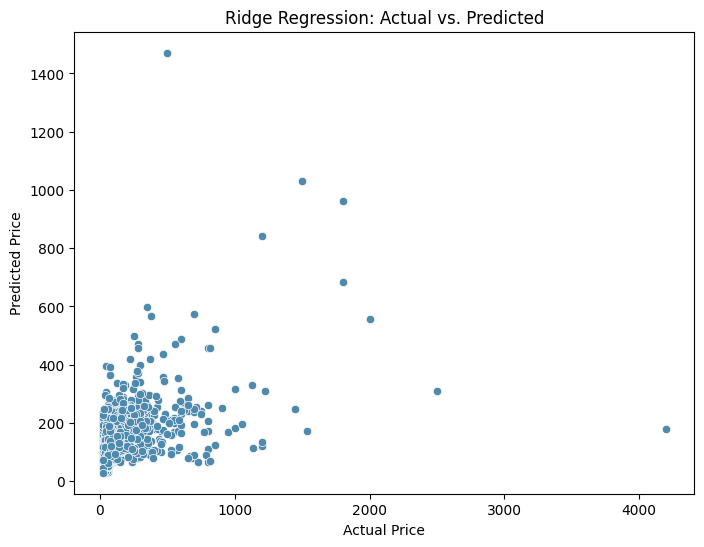

Ridge Regression R^2 Score on Test Set: 0.2013


In [64]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Assuming df1 is your DataFrame containing all the variables
# Extracting features and target variable
X = df1.drop('Price', axis=1)  # Use all columns except 'Price' as features
y = df1['Price']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CatBoost Regressor model
model = CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, loss_function='RMSE', cat_features=list(X.select_dtypes(include=['object']).columns))

# Fit the model to the training data
model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=10)

y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Ridge Regression: Actual vs. Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

# Get the R^2 score on the test set
r2_score = model.score(X_test, y_test)
print(f'Ridge Regression R^2 Score on Test Set: {r2_score:.4f}')


In [65]:
sns.set_style("whitegrid")

def triple_plot(x, title, c):
    fig, ax = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
    
    # Use histplot for histogram and KDE
    sns.histplot(x, kde=True, ax=ax[0], color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')
    
    # Use boxplot
    sns.boxplot(x, ax=ax[1], color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')
    
    # Use violinplot
    sns.violinplot(x, ax=ax[2], color=c)
    ax[2].set(xlabel=None)
    ax[2].set_title('Violin plot')
    
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(pad=3.0)
    plt.show()

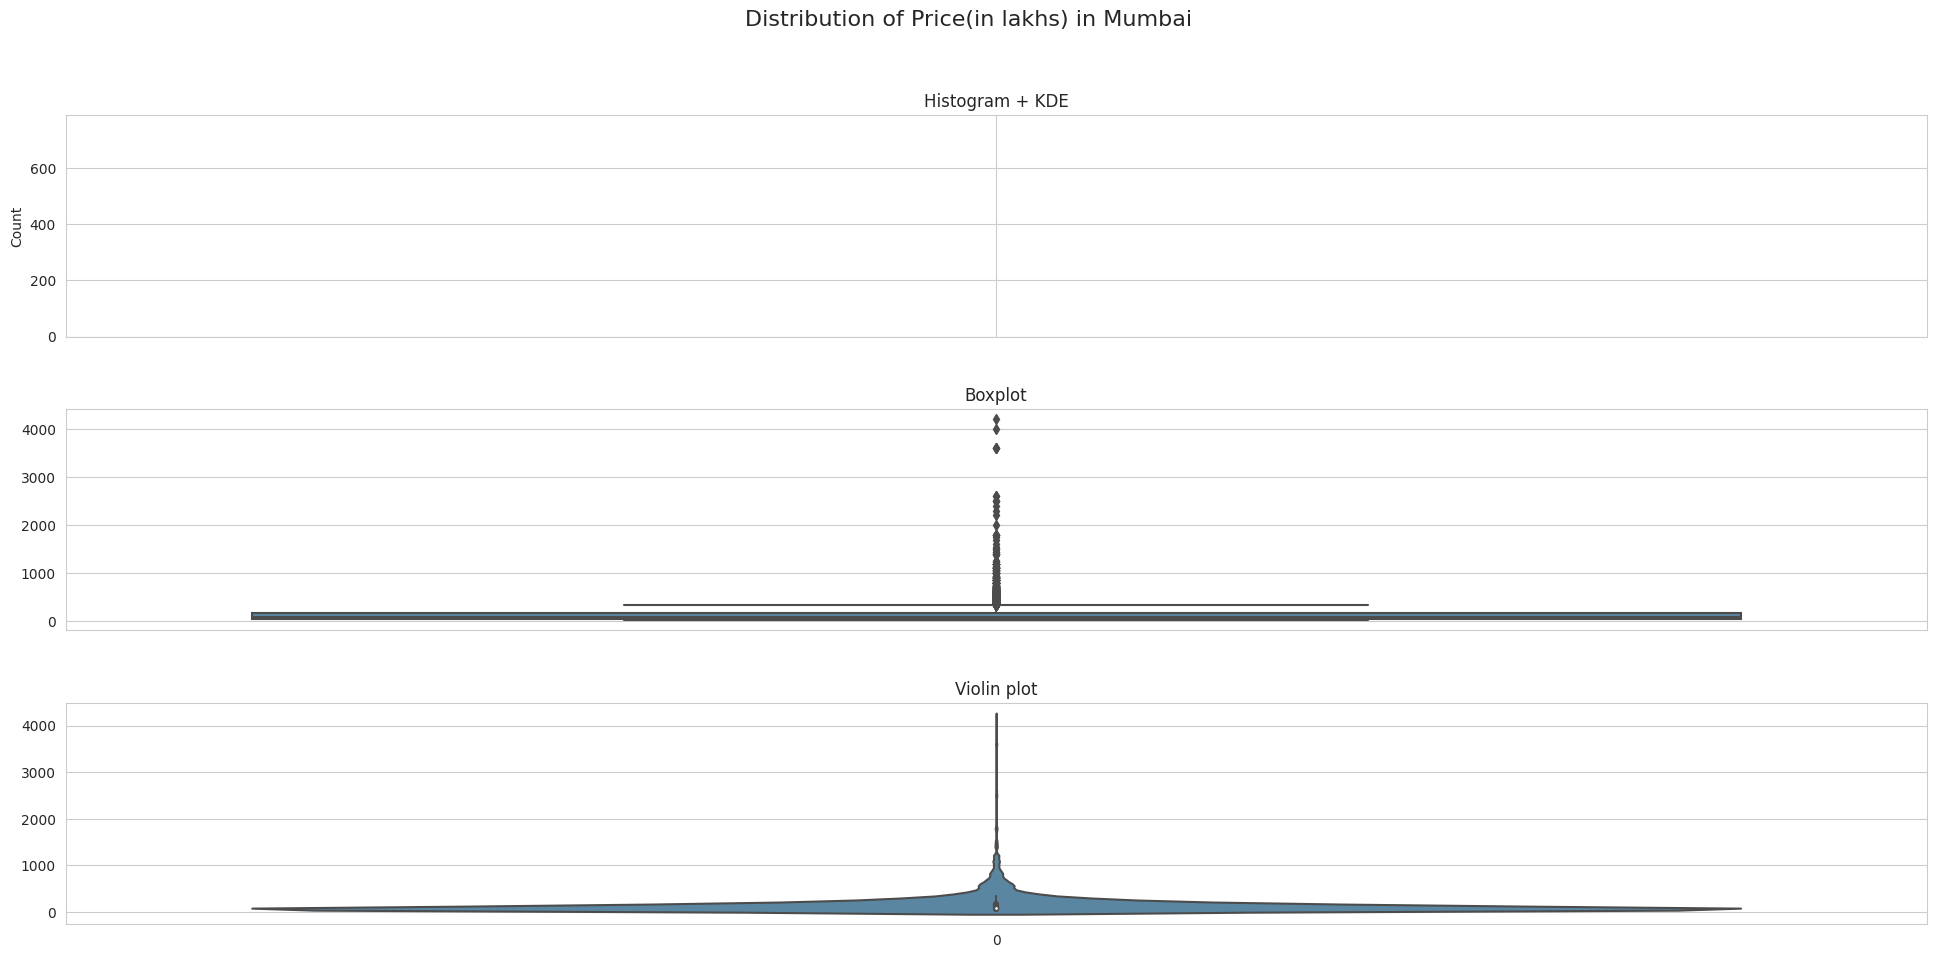

In [66]:
triple_plot(df1['Price'],'Distribution of Price(in lakhs) in Mumbai',custom_colors[0])

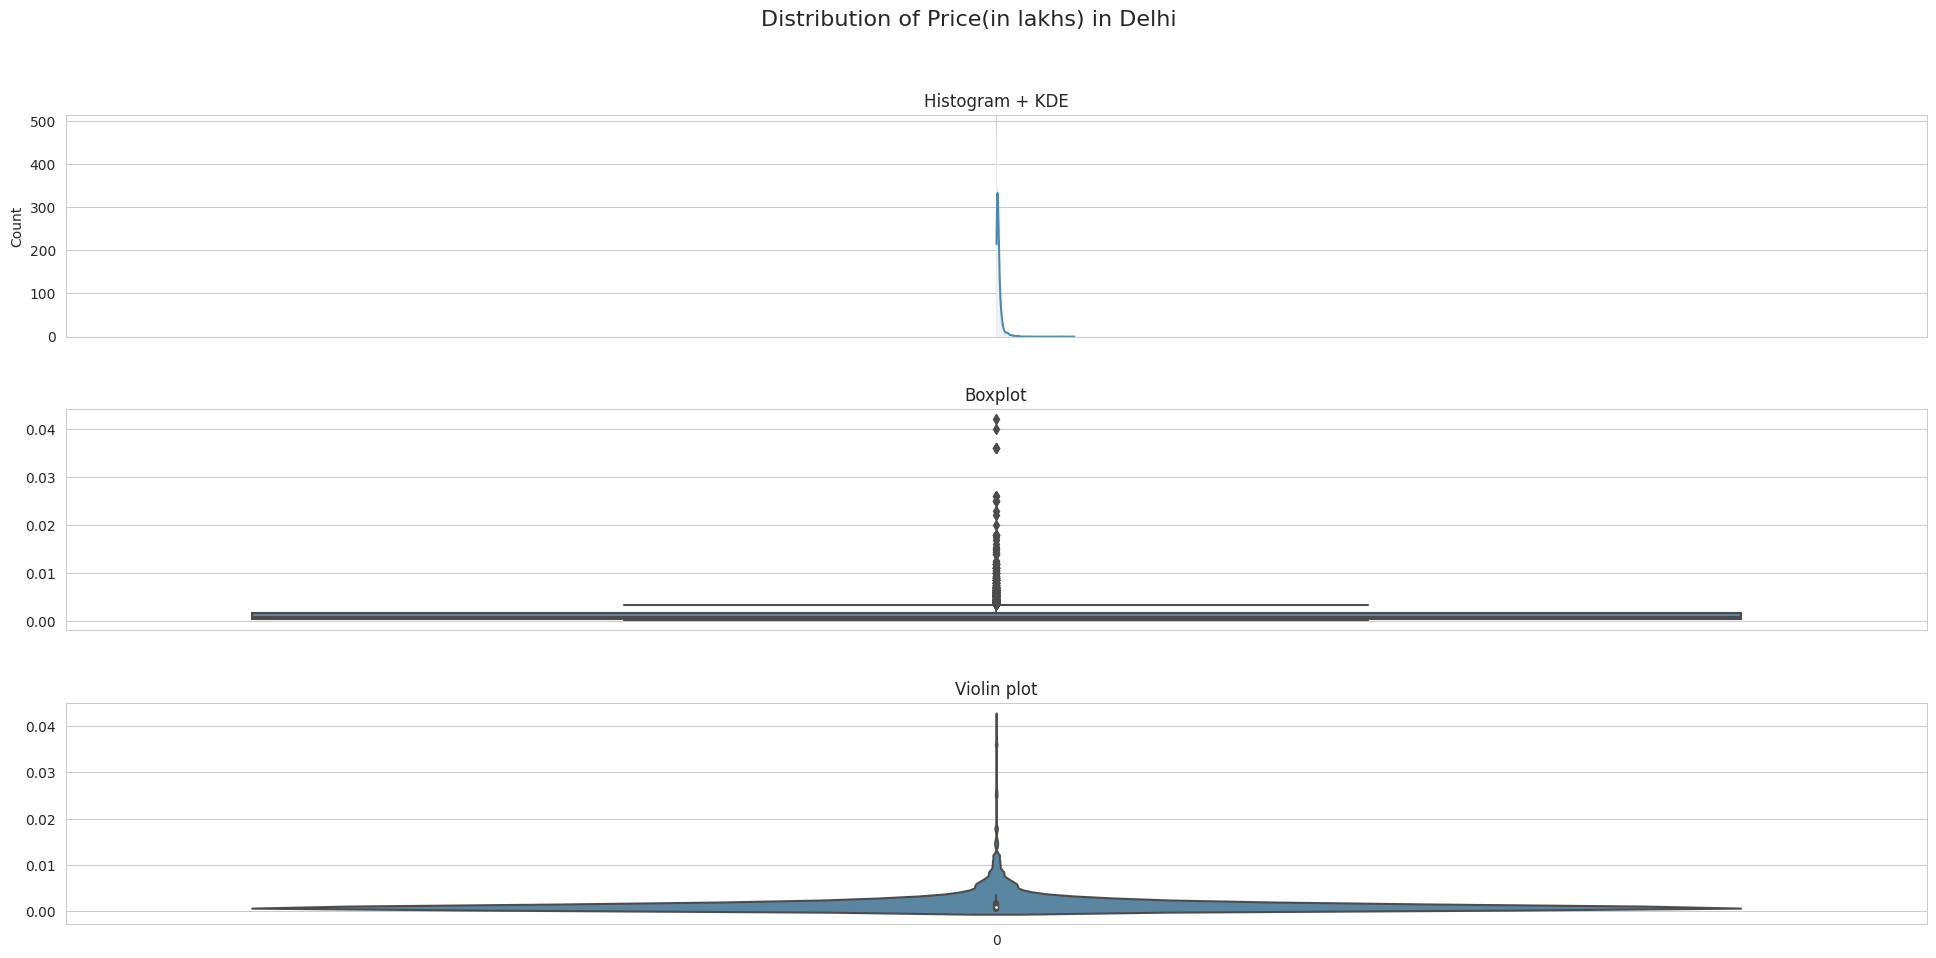

In [67]:
triple_plot(df2['Price'],'Distribution of Price(in lakhs) in Delhi',custom_colors[0])

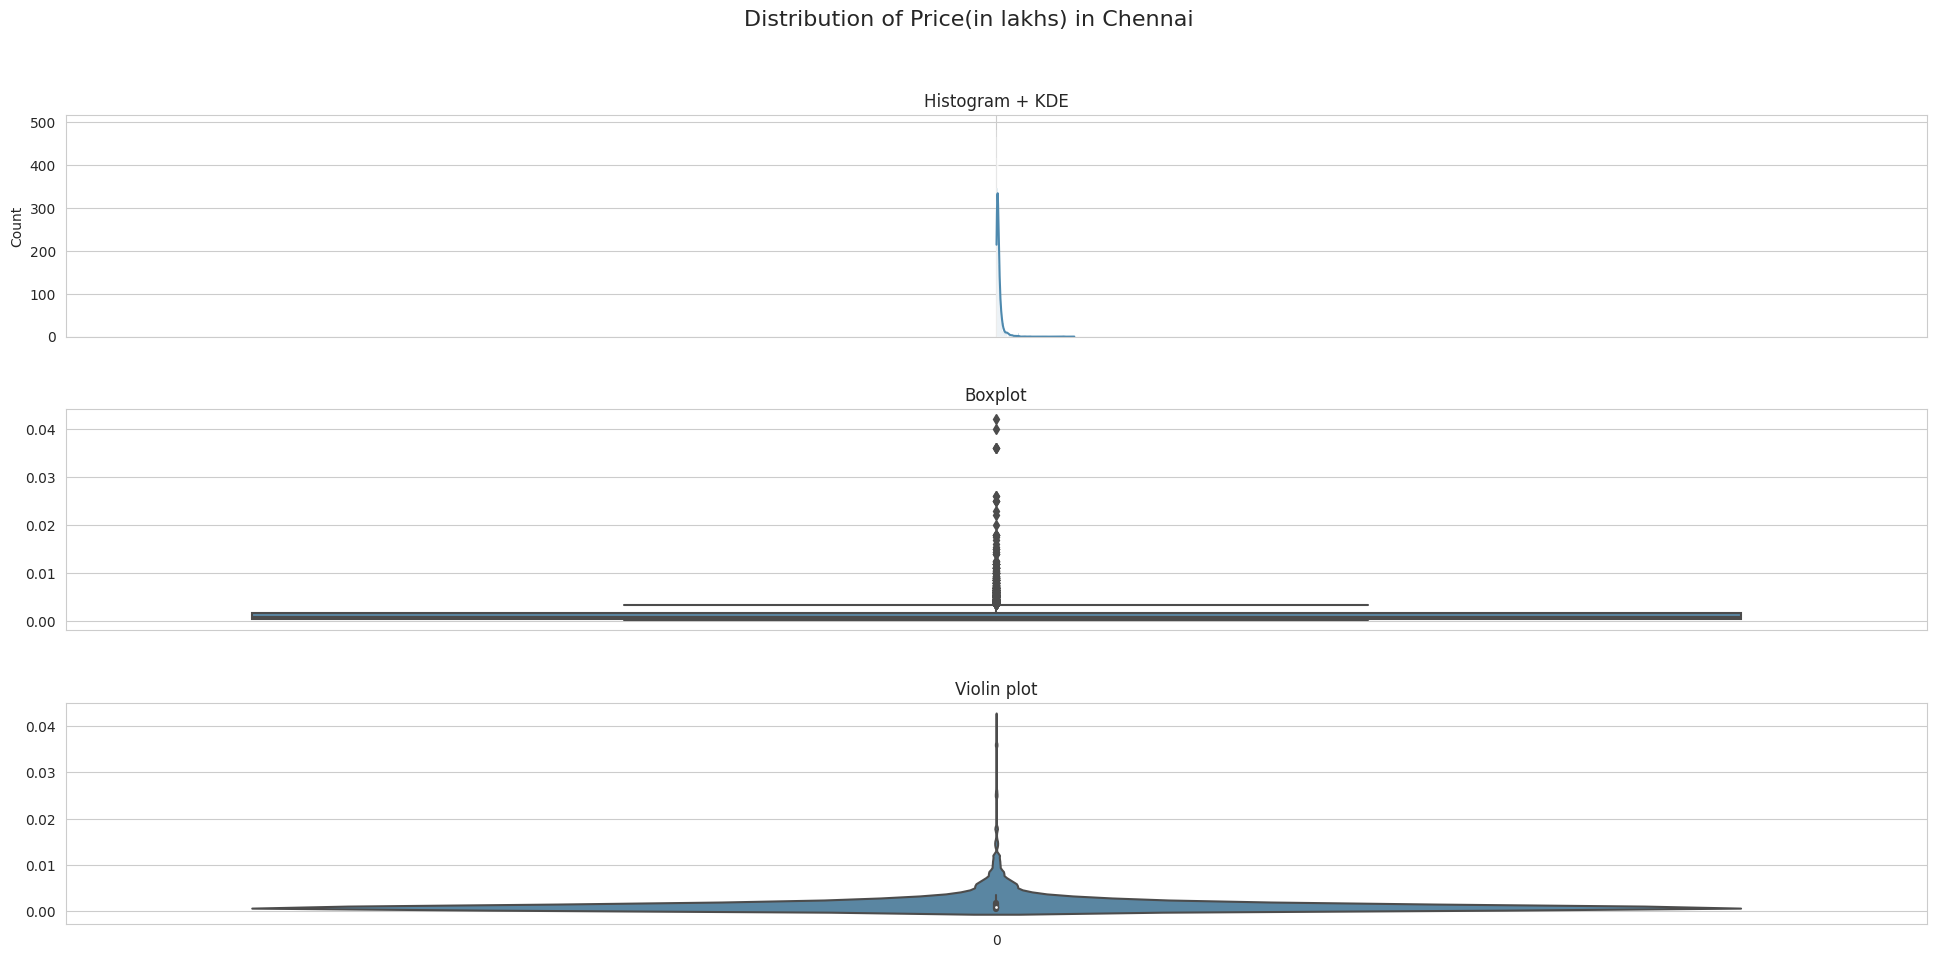

In [68]:
triple_plot(df3['Price'],'Distribution of Price(in lakhs) in Chennai',custom_colors[0])

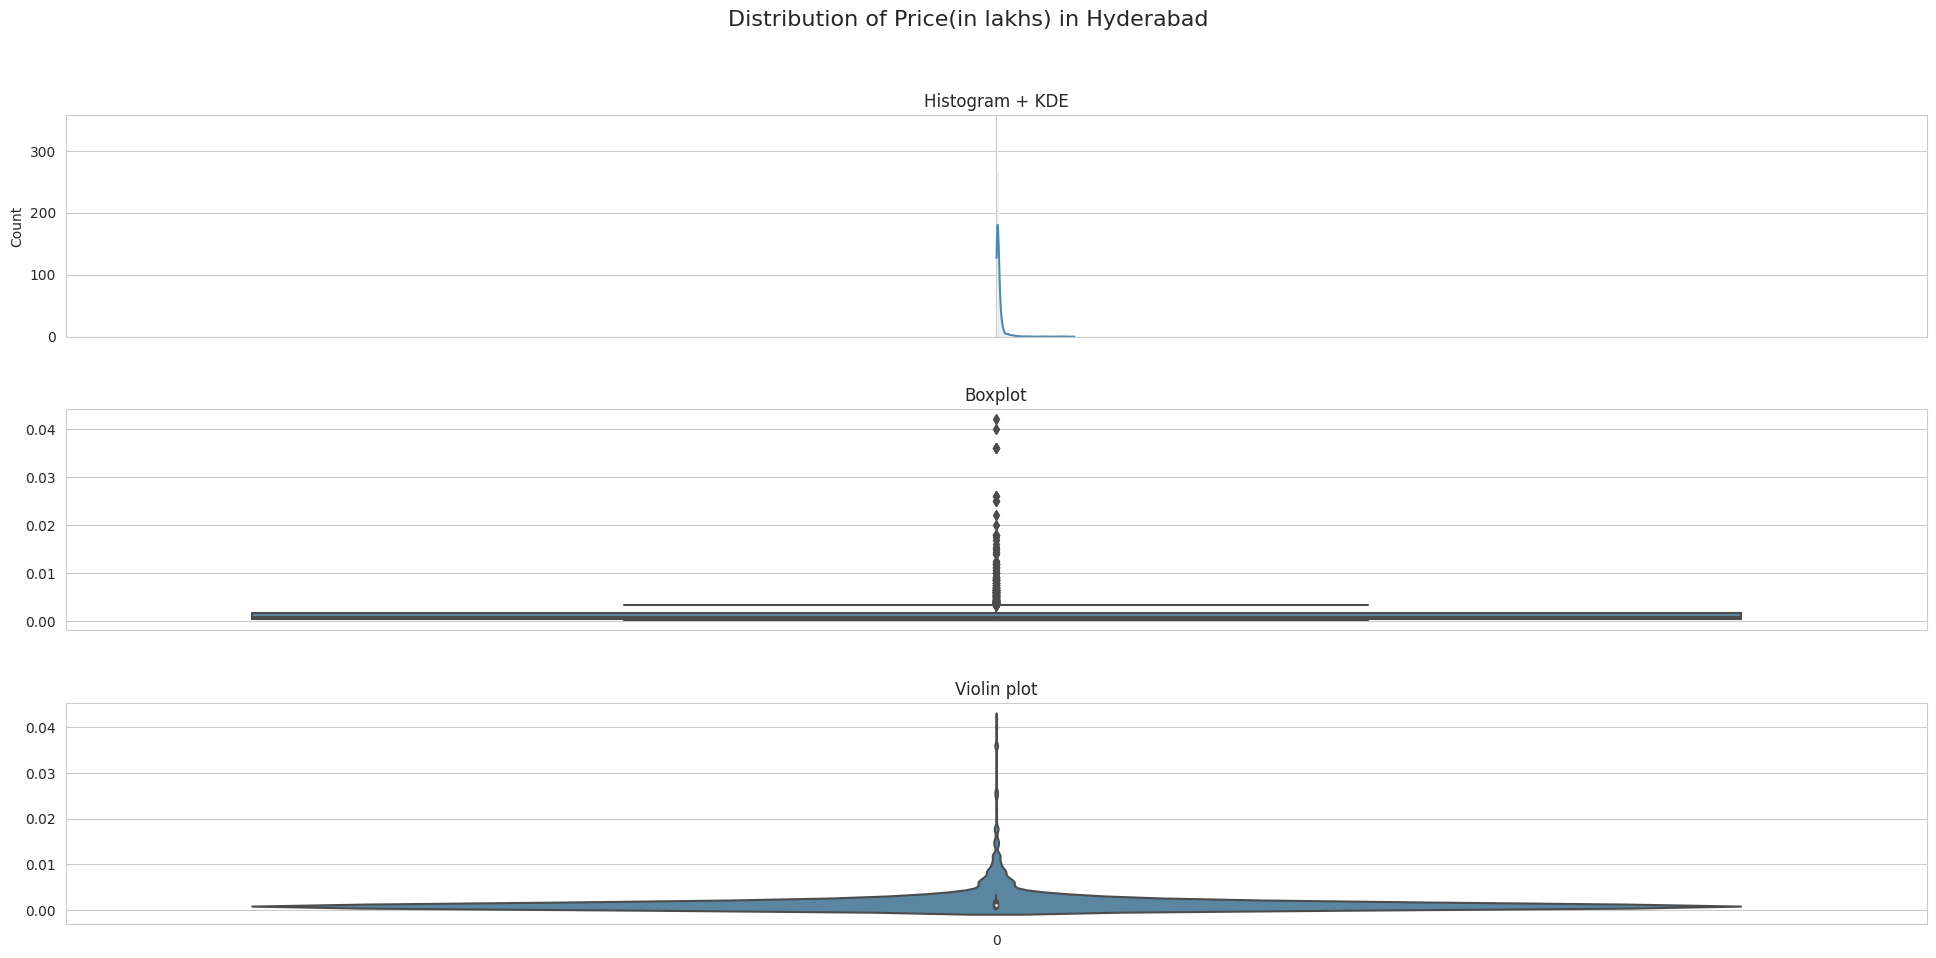

In [69]:
triple_plot(df4['Price'],'Distribution of Price(in lakhs) in Hyderabad',custom_colors[0])

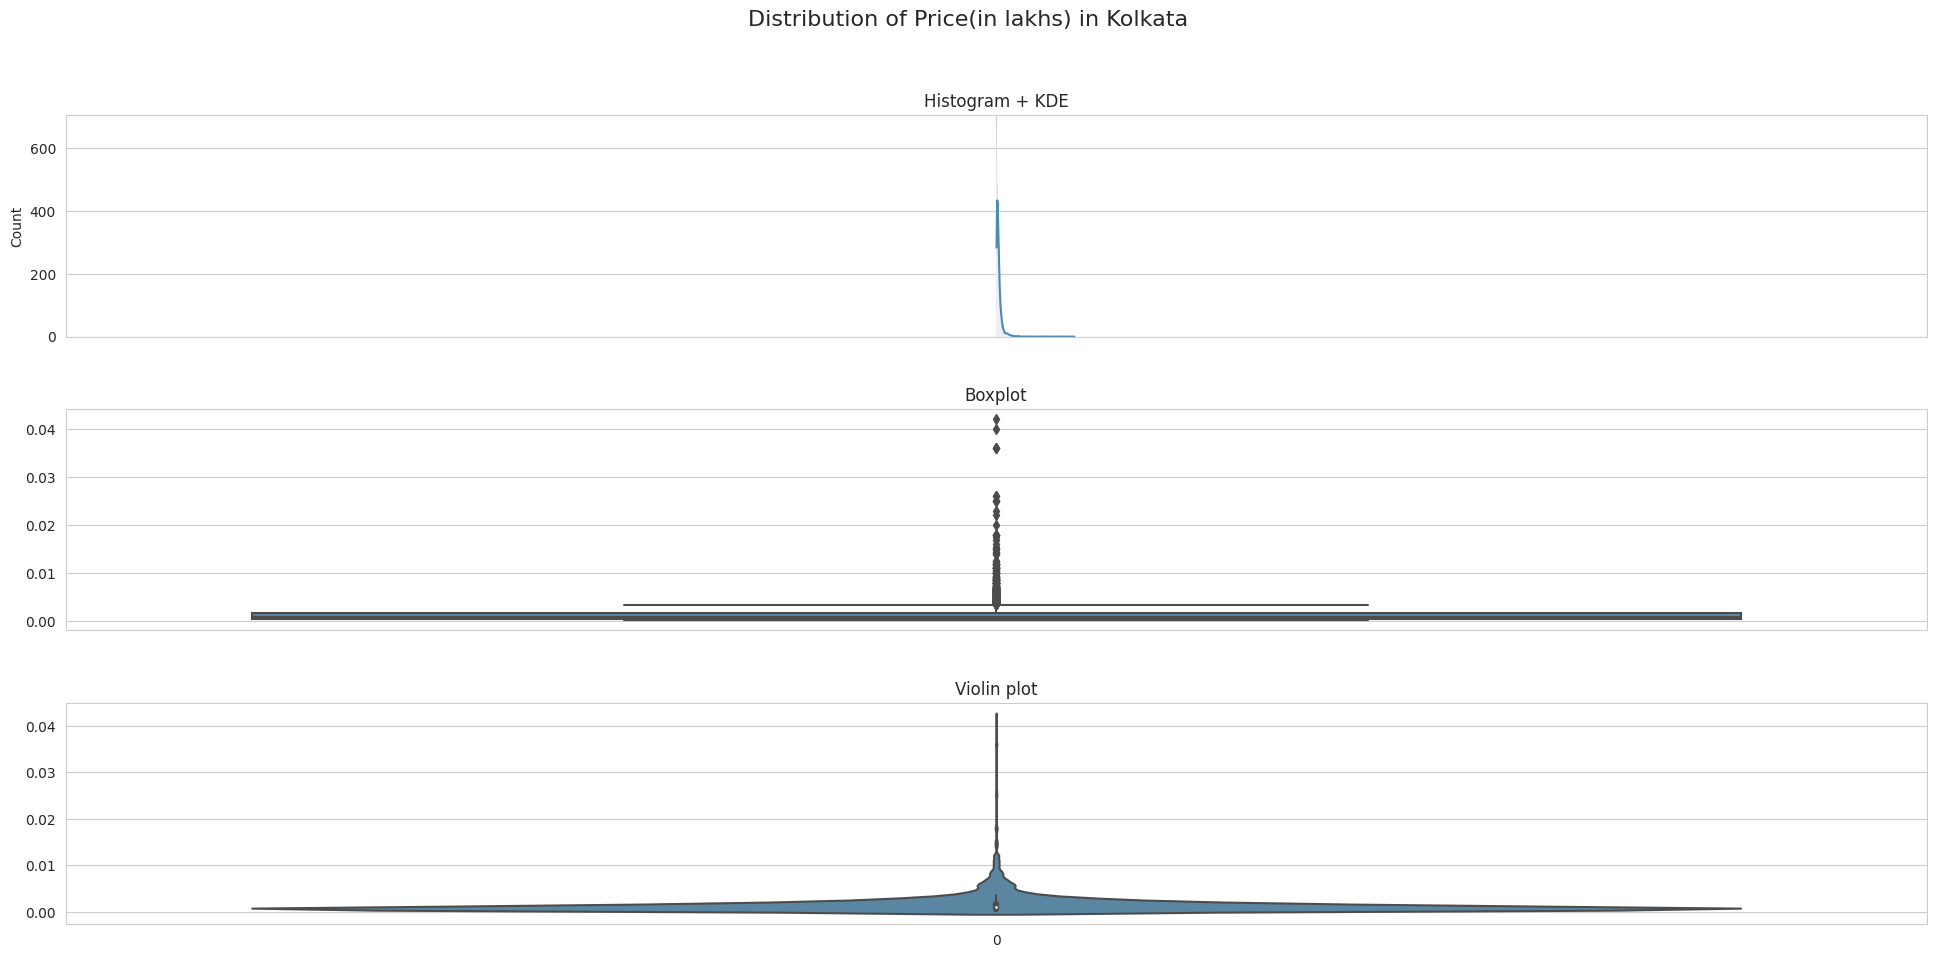

In [70]:
triple_plot(df5['Price'],'Distribution of Price(in lakhs) in Kolkata',custom_colors[0])

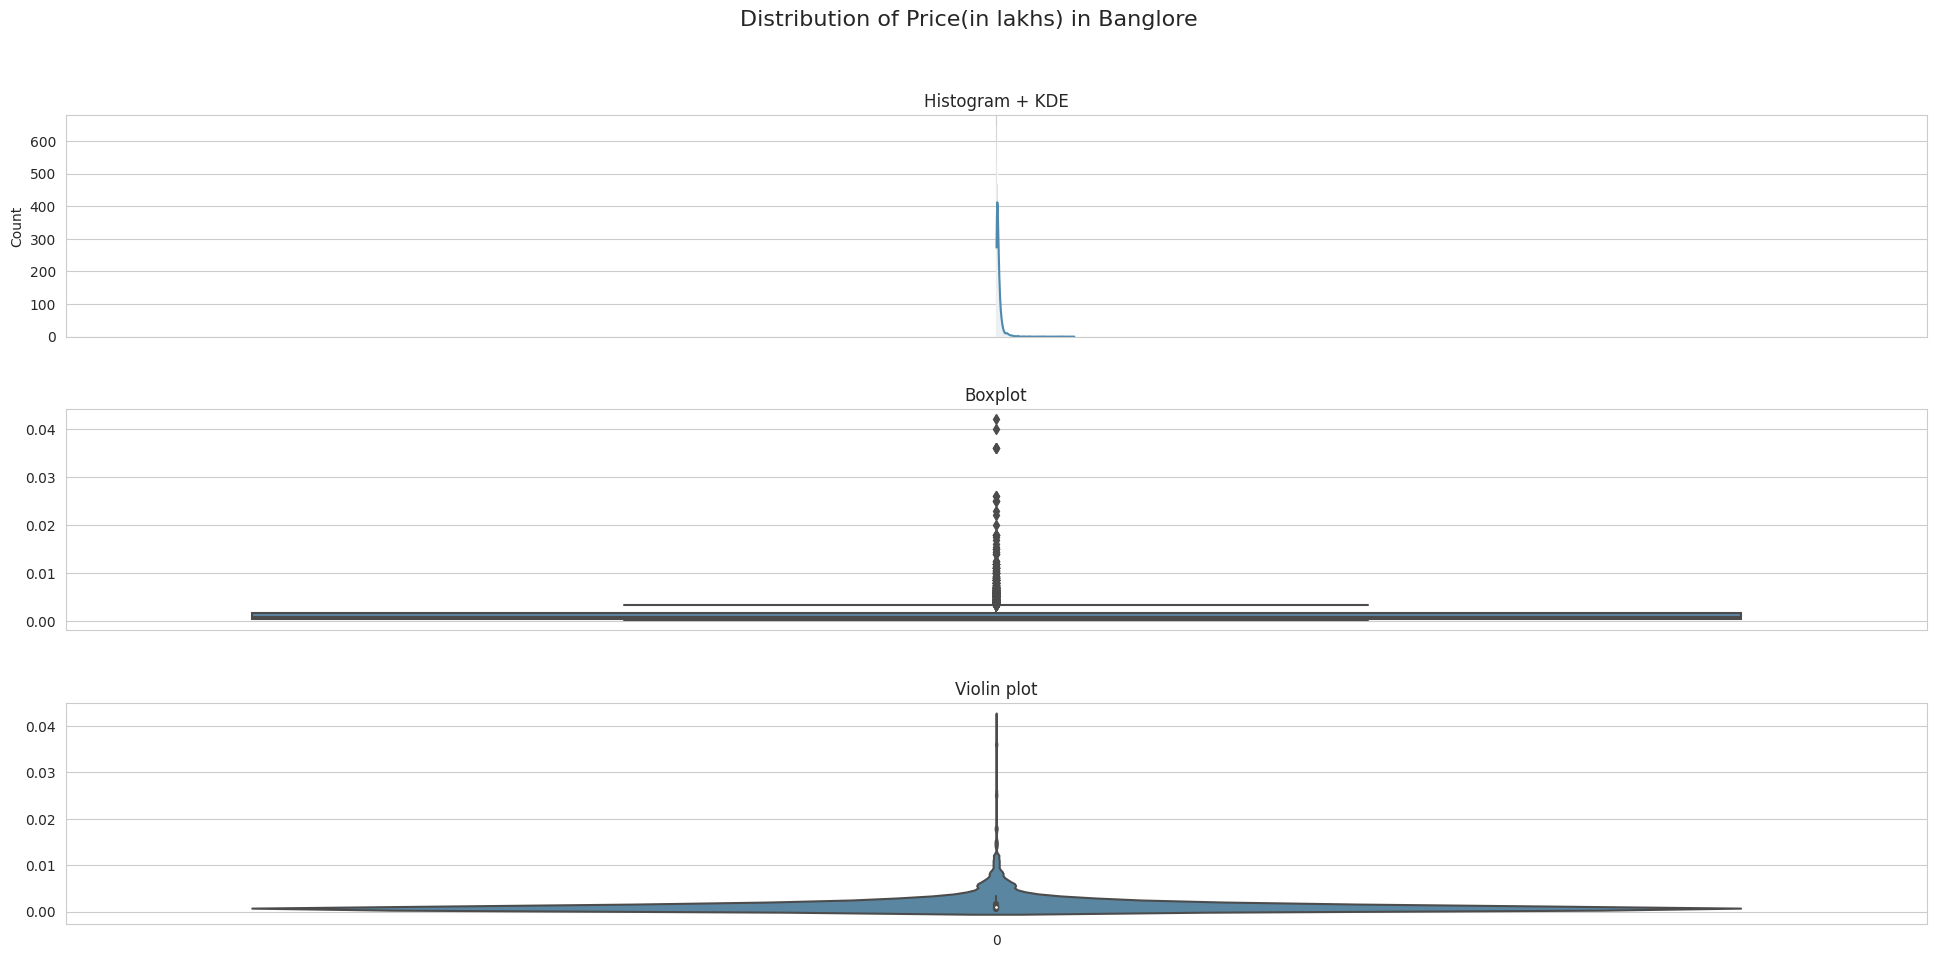

In [71]:
triple_plot(df6['Price'],'Distribution of Price(in lakhs) in Banglore',custom_colors[0])